#
This code done by Mhd Taha Daboul

In [72]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder ,MinMaxScaler
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.feature_selection import SelectPercentile , f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.neural_network import MLPRegressor
import numpy as np


#
Reading Data

In [73]:
# Load data with correct paths
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
data_sample_submission = pd.read_csv("sample_submission.csv")  # Ensure this file exists

# Merge test_data with sample_submission (if SalePrice is valid)
test_data['SalePrice'] = data_sample_submission['SalePrice']

# Concatenate train and test data
#data = pd.concat([train_data, test_data], ignore_index=True)
data = train_data
# Proceed with preprocessing and modeling

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

###
Data visualization

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6540\1830991542.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


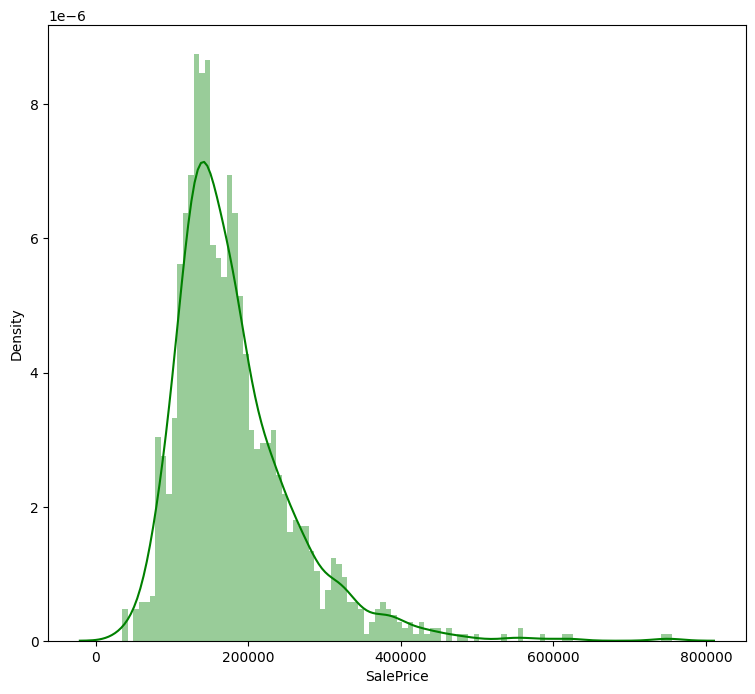

In [75]:
print(data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [76]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
categorical_col = [col for col in data.columns if data[col].dtype == "object"]
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [77]:
print(categorical_col)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


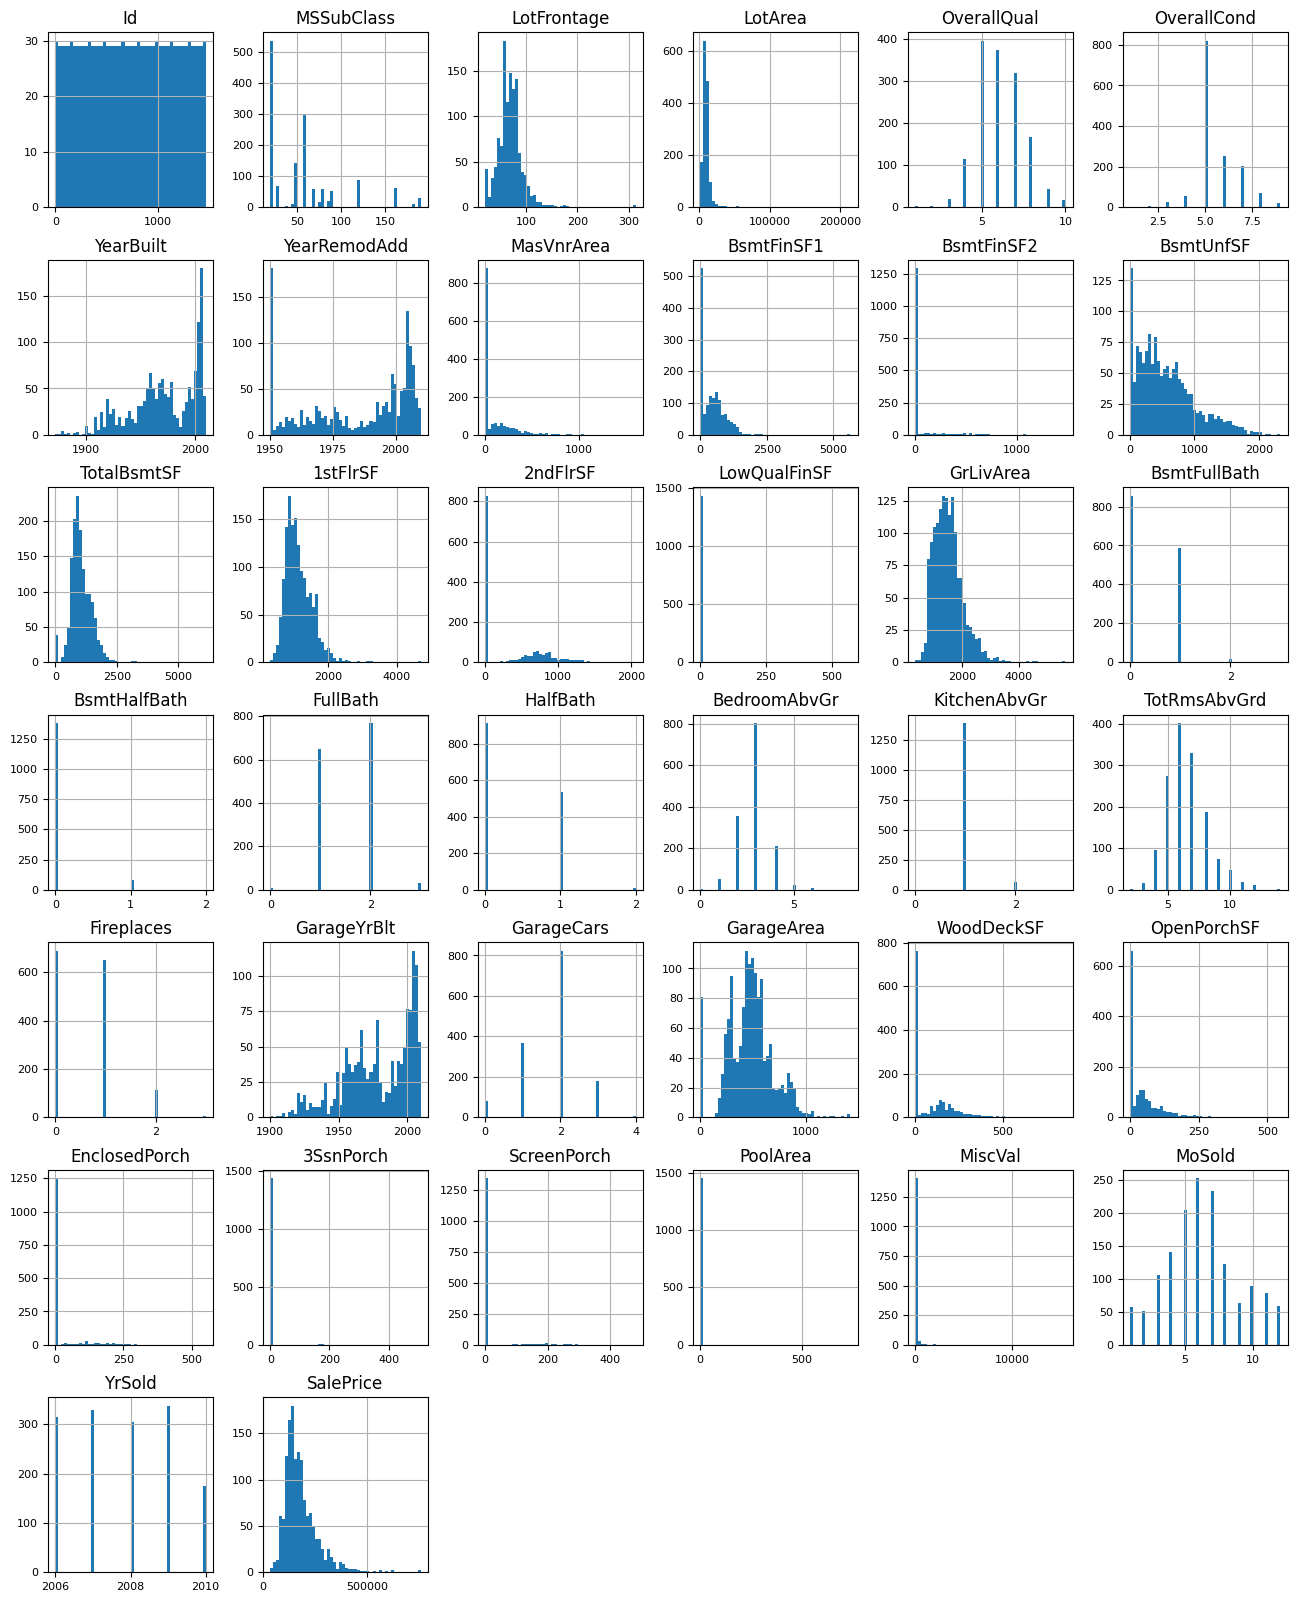

In [78]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [79]:
data.drop(columns=["Id"])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [80]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


###
Data preproccessing

In [81]:
data['MSSubClass'].isna().value_counts()

MSSubClass
False    1460
Name: count, dtype: int64

In [82]:
le = LabelEncoder()
data['MSSubClass'] = le.fit_transform(data['MSSubClass'])
data['MSSubClass'].value_counts()

MSSubClass
0     536
5     299
4     144
11     87
1      69
12     63
6      60
8      58
10     52
14     30
9      20
7      16
3      12
13     10
2       4
Name: count, dtype: int64

In [83]:
data['MSZoning'].isna().value_counts()

MSZoning
False    1460
Name: count, dtype: int64

In [84]:
data[data["MSZoning"].isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [85]:
# Replace NaN values in 'MSZoning' with 'RL'
data['MSZoning'] = data['MSZoning'].fillna('RL')
data['MSZoning'].isna().value_counts()

MSZoning
False    1460
Name: count, dtype: int64

In [86]:
data['MSZoning'].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [87]:
le = LabelEncoder()
data['MSZoning'] = le.fit_transform(data['MSZoning'])
data['MSZoning'].value_counts()

MSZoning
3    1151
4     218
1      65
2      16
0      10
Name: count, dtype: int64

In [88]:
data['LotFrontage'].isna().value_counts()

LotFrontage
False    1201
True      259
Name: count, dtype: int64

In [89]:
median_of_Lotfro = data['LotFrontage'].median()
data['LotFrontage'] = data["LotFrontage"].fillna(median_of_Lotfro)
data['LotFrontage'].isna().value_counts()


LotFrontage
False    1460
Name: count, dtype: int64

In [90]:
# droping columns that have many nulls and the "Id" column
data.drop(
    ["Id", "Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature"],
    axis=1,
    inplace=True,
)
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,0,3,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,5,3,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,6,3,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,3,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [91]:
data.iloc[:,0:15]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle
0,5,3,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story
1,0,3,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story
2,5,3,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story
3,6,3,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story
4,5,3,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story
1456,0,3,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story
1457,6,3,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story
1458,0,3,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story


In [92]:
data["Street"].value_counts()
data.drop(["Street"], axis=1, inplace=True)
data.iloc[:,0:15].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual
0,5,3,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7
1,0,3,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6
2,5,3,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7
3,6,3,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7
4,5,3,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8


In [93]:
#function that checks for null values, fills them with the median or mode depending on the feature type, and deletes columns with more than 50% null values:
def handle_null_values(df):
    null_summary = {}
    
    for column in df.columns:
        null_count = df[column].isna().sum()
        null_percentage = null_count / len(df)
        
        if null_percentage > 0.5:
            # If more than 50% null values, drop the column
            df.drop(columns=[column], inplace=True)
            null_summary[column] = {'Has Null': True, 'Count': null_count, 'Action': 'Dropped'}
        else:
            has_nulls = null_count > 0
            if has_nulls:
                if df[column].dtype in ['float64', 'int64']:
                    # Fill NaN with median if numerical
                    median_value = df[column].median()
                    df[column].fillna(median_value, inplace=True)
                    action = f"Filled with median value: {median_value}"
                else:
                    # Fill NaN with mode if categorical
                    mode_value = df[column].mode()[0]
                    df[column].fillna(mode_value, inplace=True)
                    action = f"Filled with mode value: {mode_value}"
            else:
                action = 'No Nulls'
                
            null_summary[column] = {'Has Null': has_nulls, 'Count': null_count, 'Action': action}
    
    return pd.DataFrame(null_summary).transpose()




In [94]:
handle_null_values(data)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6540\1076983937.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6540\1076983937.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

,Has Null,Count,Action
MSSubClass,False,0,No Nulls
MSZoning,False,0,No Nulls
LotFrontage,False,0,No Nulls
LotArea,False,0,No Nulls
LotShape,False,0,No Nulls
...,...,...,...
MoSold,False,0,No Nulls
YrSold,False,0,No Nulls
SaleType,False,0,No Nulls
SaleCondition,False,0,No Nulls


In [95]:
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,0,3,80.0,9600,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,5,3,68.0,11250,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,6,3,60.0,9550,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,3,84.0,14260,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,0,3,85.0,13175,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,6,3,66.0,9042,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,0,3,68.0,9717,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


###
Features selection

In [96]:
for col in data.select_dtypes(include=['object']):
    print(f"  {data[col].value_counts()}\n")

  LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

  LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

  Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

  LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

  LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

  Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

  Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
N

In [97]:
data.drop(
    [
        "Utilities",
        "Condition2",
        "RoofMatl",
        "ExterCond",
        "BsmtCond",
        "Heating",
        "GarageCond",
    ],
    axis=1,
    inplace=True,
)

data.shape

(1460, 66)

In [98]:
def transform_selected_numeric_features_to_binary(df):
    """
    Convert numeric features in a DataFrame to 0/1 if the percentage of zeros 
    in the column exceeds 80%. Non-numeric columns and numeric columns that do not meet 
    this condition remain unchanged.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the features.

    Returns:
    pd.DataFrame: DataFrame with selected numeric columns transformed.
    """
    count_of_colunm_pro = 0
    # Iterate over each numeric column in the DataFrame
    for column in df.select_dtypes(include=['number']).columns:
        # Calculate the percentage of zeros in the column
        zero_percentage = (df[column] == 0).mean()

        # Check if the percentage of zeros exceeds 80%
        if zero_percentage > 0.50:
            count_of_colunm_pro += 1
            df[column] = (df[column] == 0).astype(int)  # Convert to binary (0/1) where 1 means value was 0
    
    return df,count_of_colunm_pro



In [99]:
data,colms_inter = transform_selected_numeric_features_to_binary(data)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,1,1,1,1,1,2,2008,WD,Normal,208500
1,0,3,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,1,1,1,1,1,5,2007,WD,Normal,181500
2,5,3,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,1,1,1,1,1,9,2008,WD,Normal,223500
3,6,3,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0,1,1,1,1,2,2006,WD,Abnorml,140000
4,5,3,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,1,1,1,1,1,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,1,1,1,1,1,8,2007,WD,Normal,175000
1456,0,3,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,1,1,1,1,1,2,2010,WD,Normal,210000
1457,6,3,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,1,1,1,1,0,5,2010,WD,Normal,266500
1458,0,3,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,0,1,1,1,1,4,2010,WD,Normal,142125


In [100]:
colms_inter

13

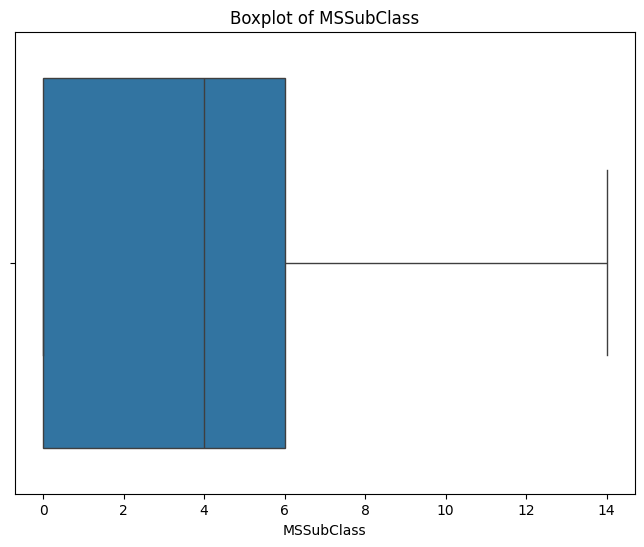

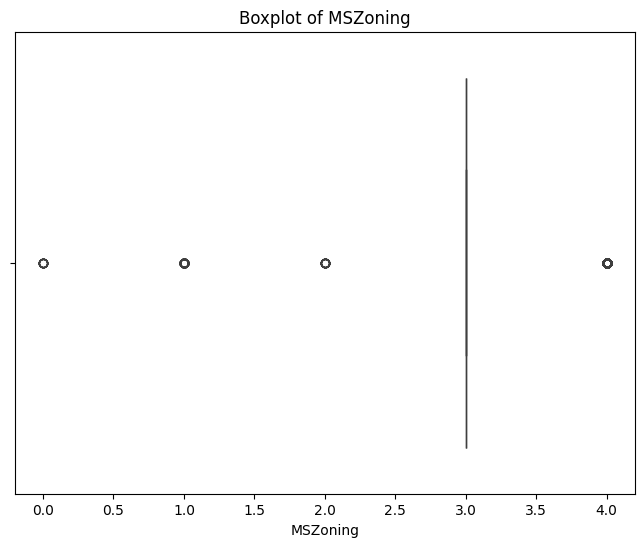

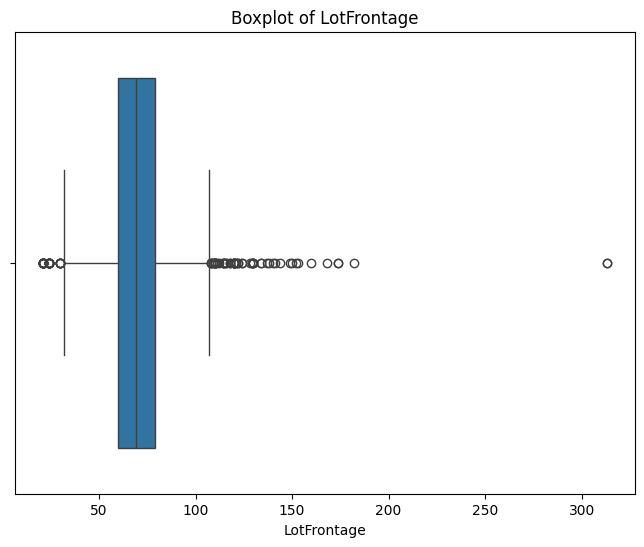

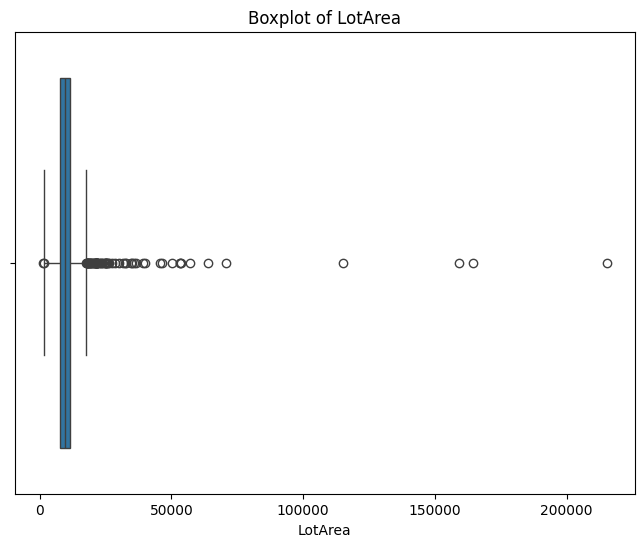

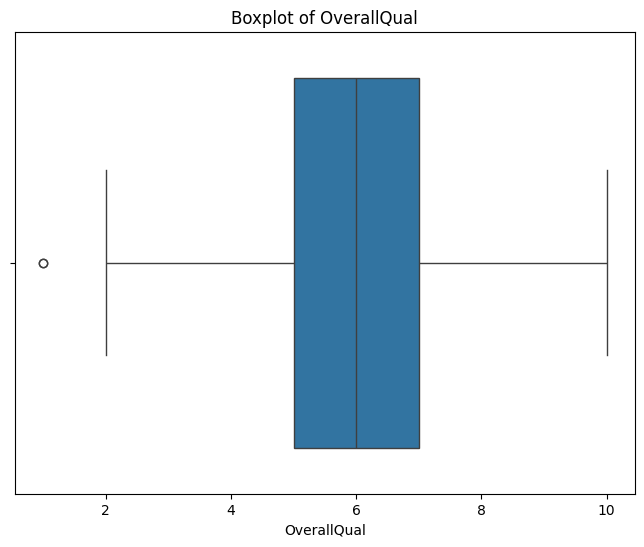

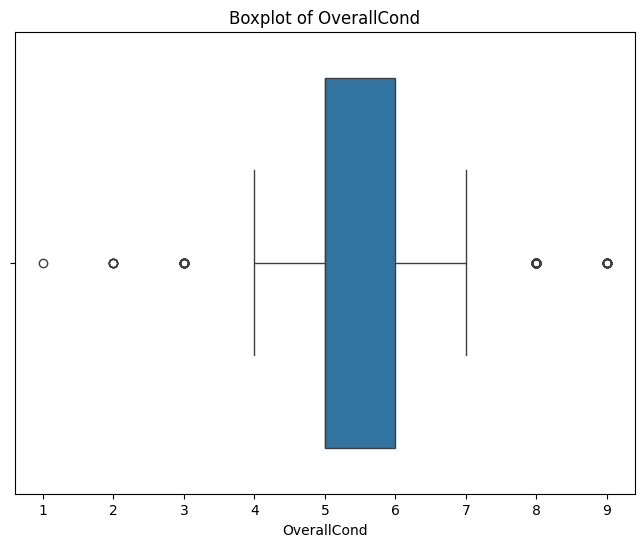

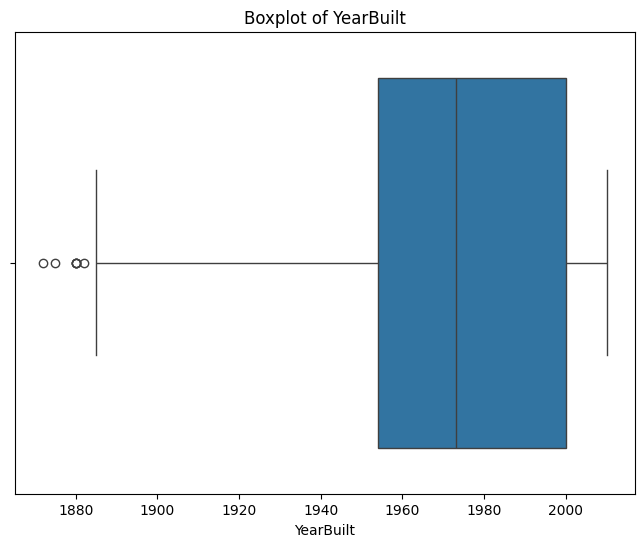

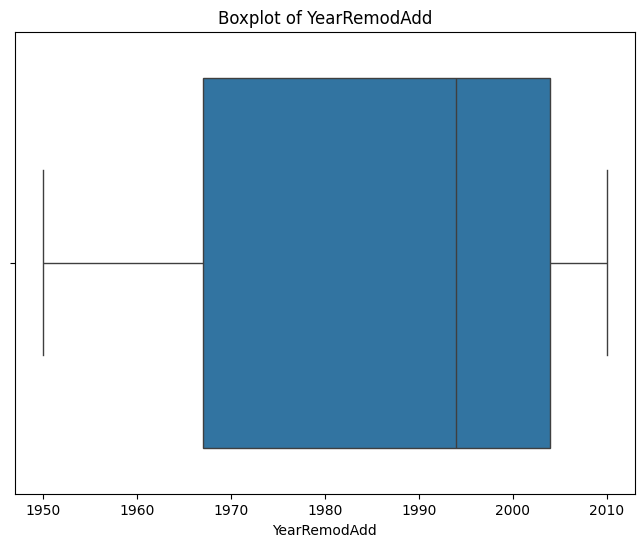

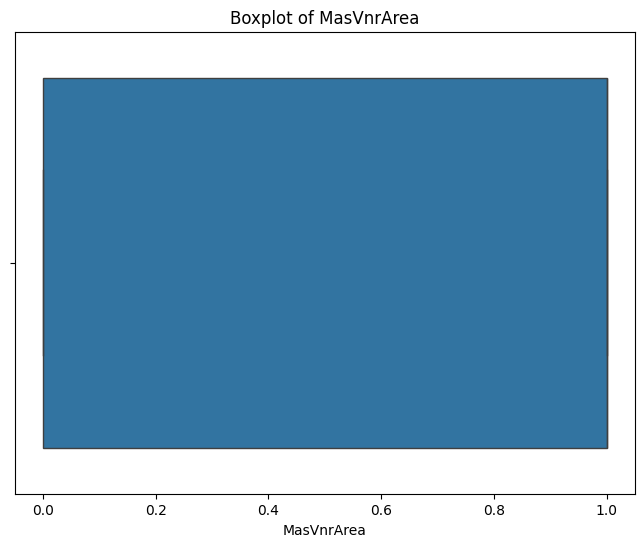

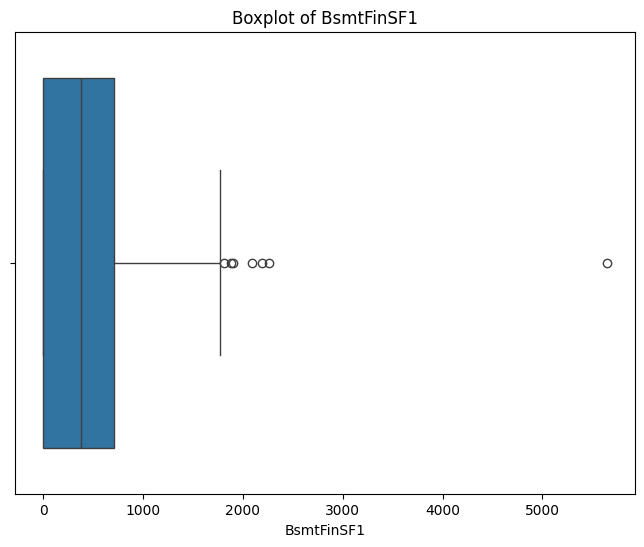

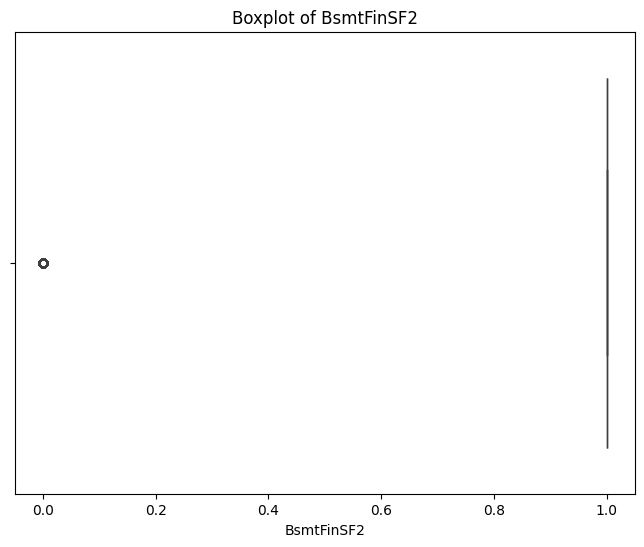

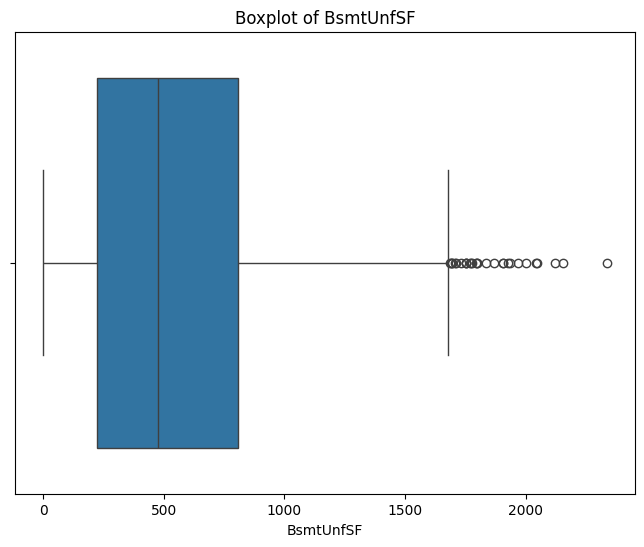

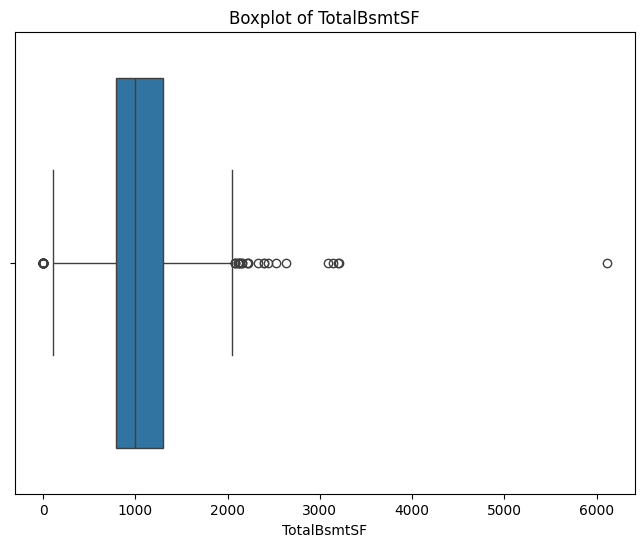

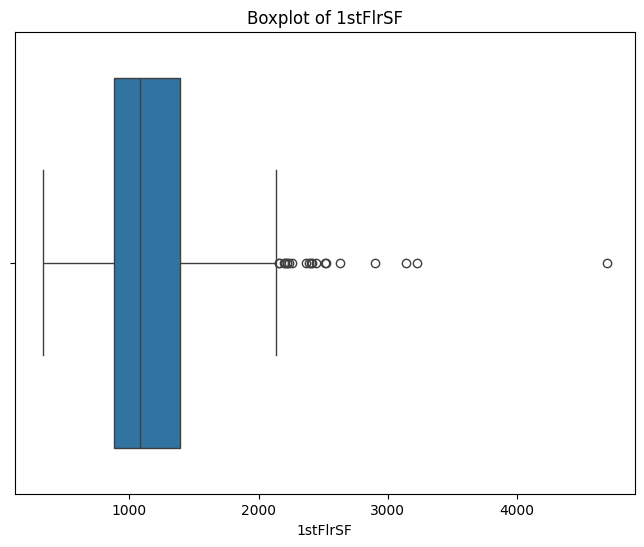

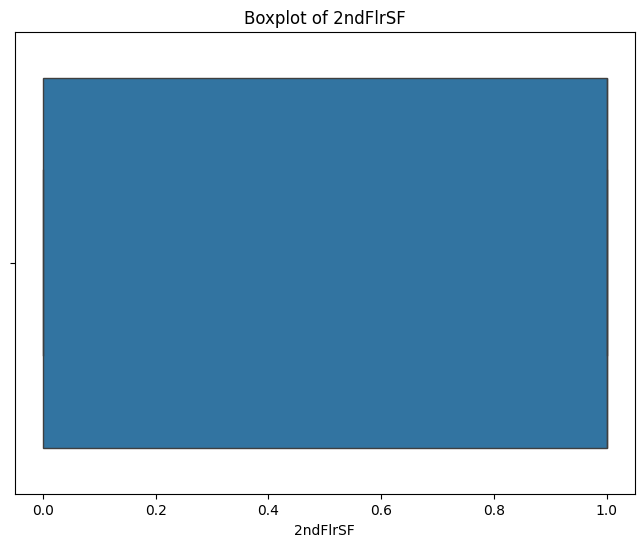

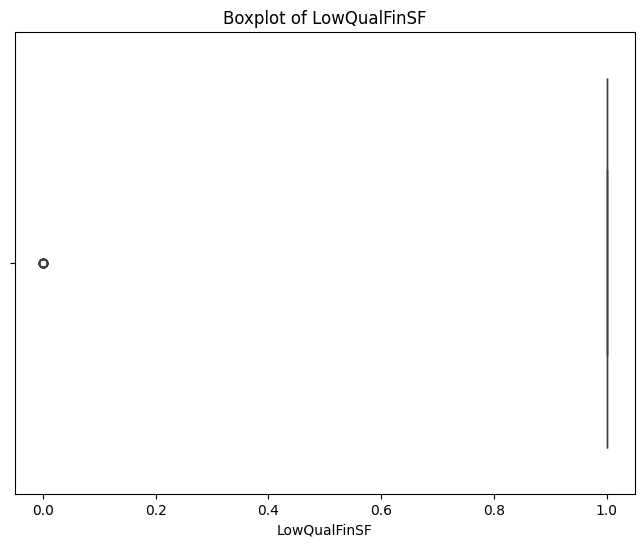

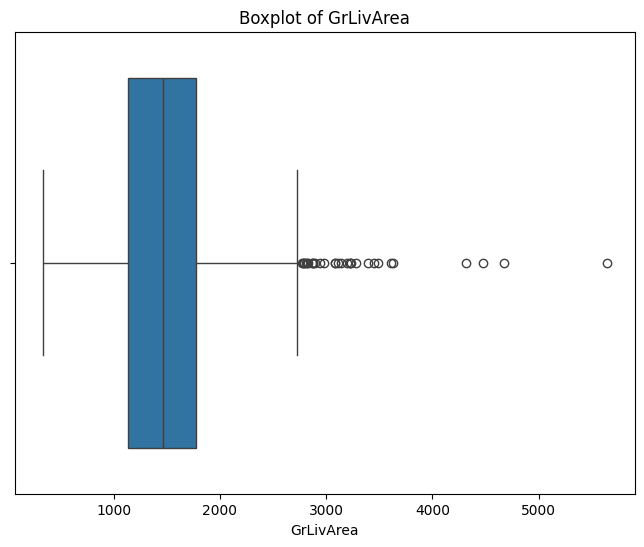

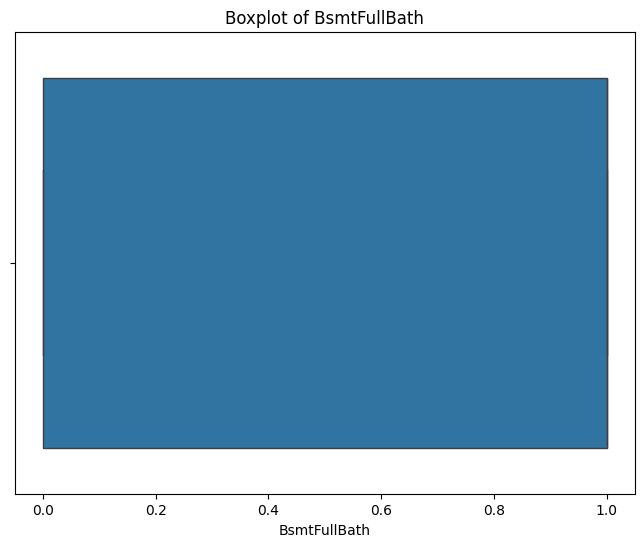

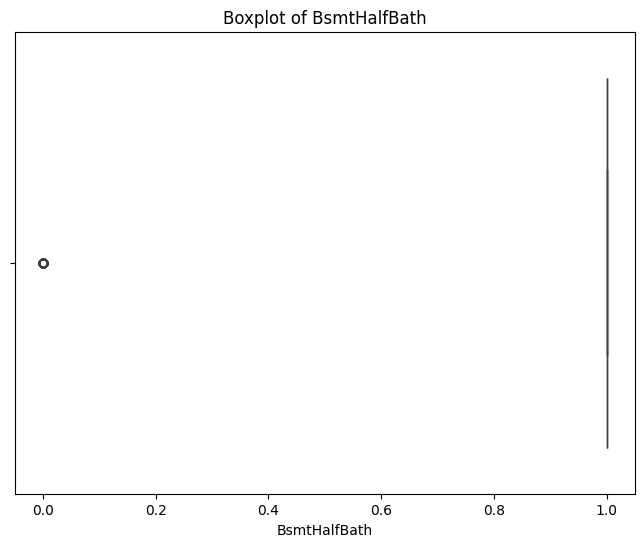

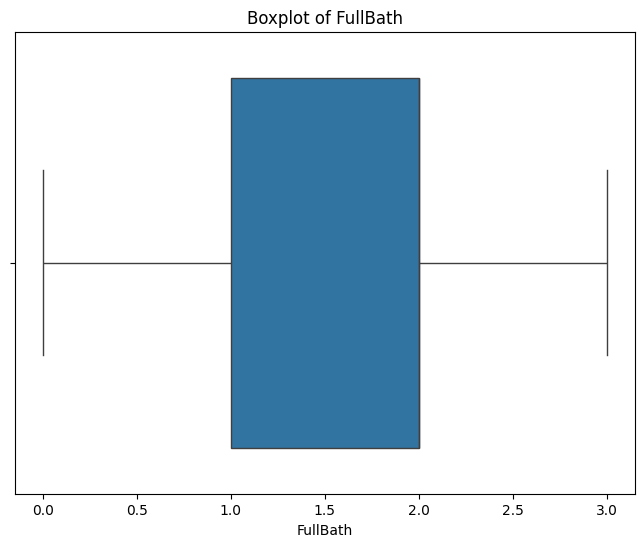

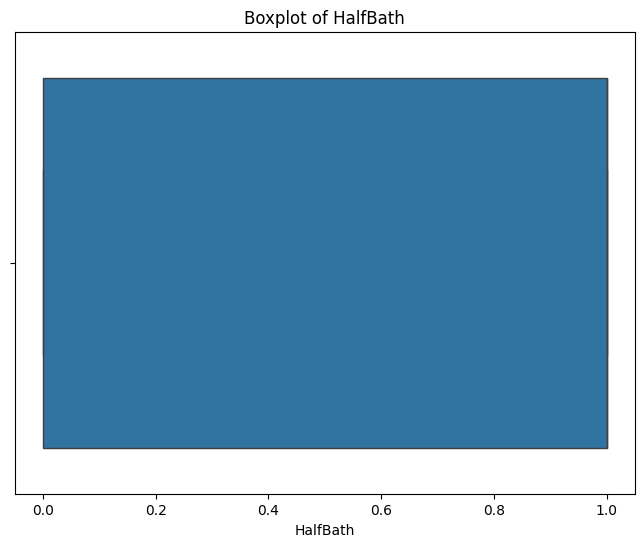

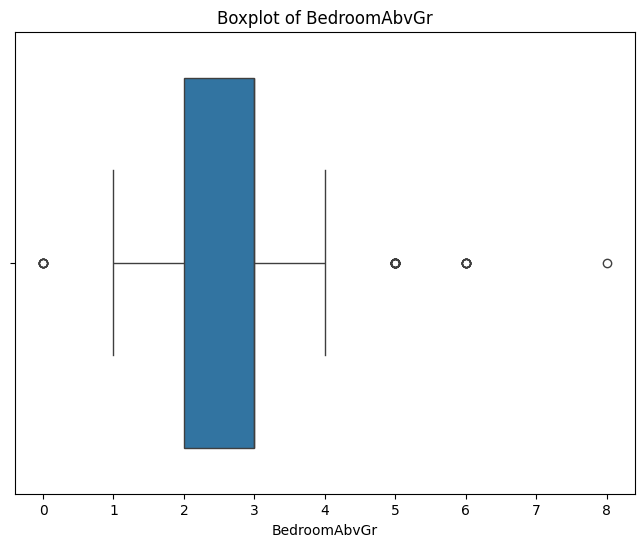

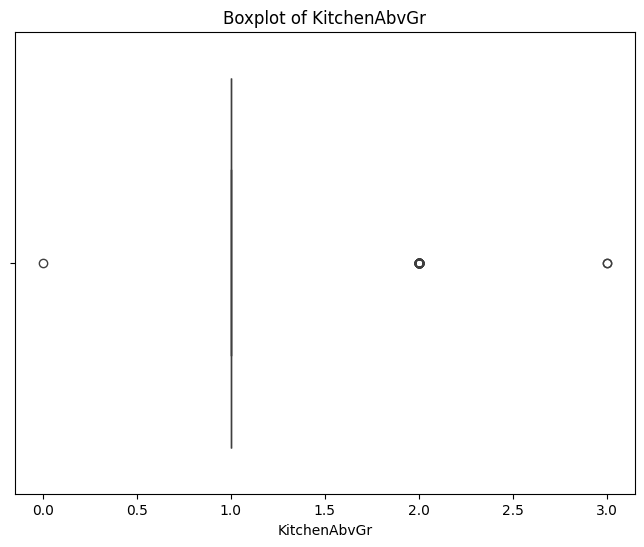

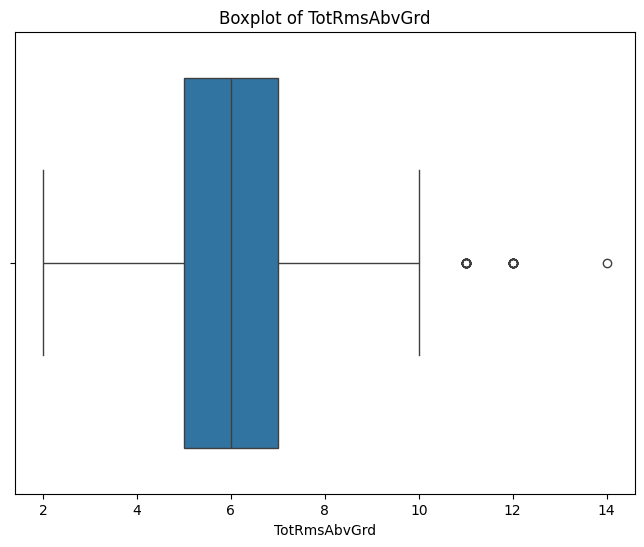

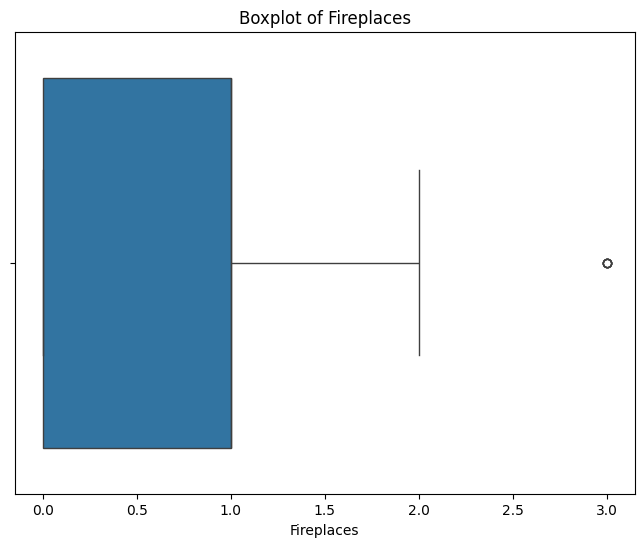

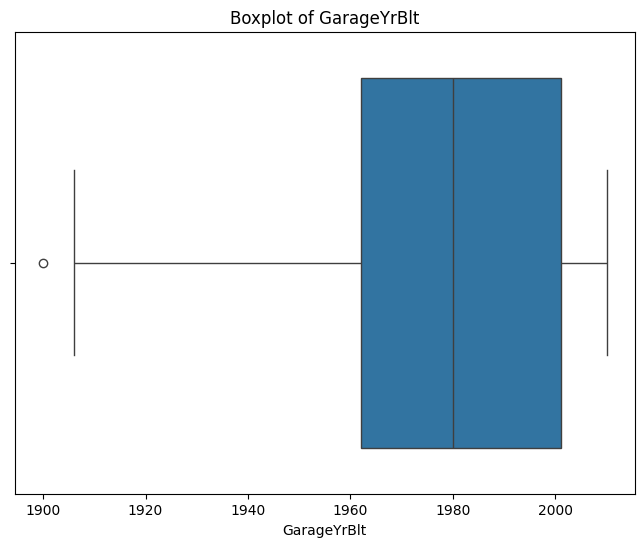

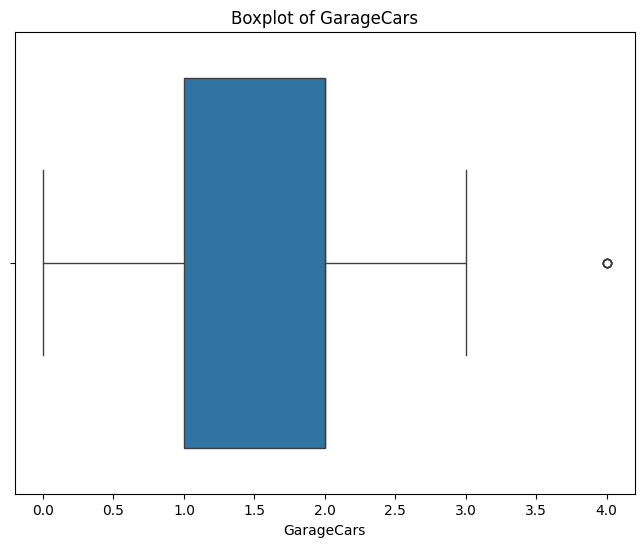

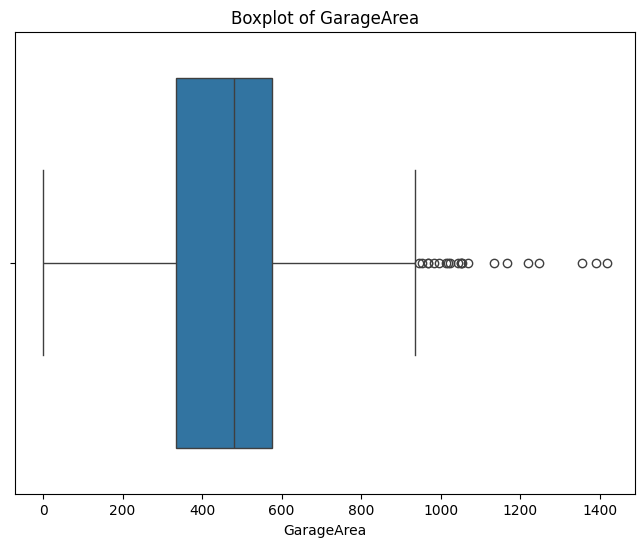

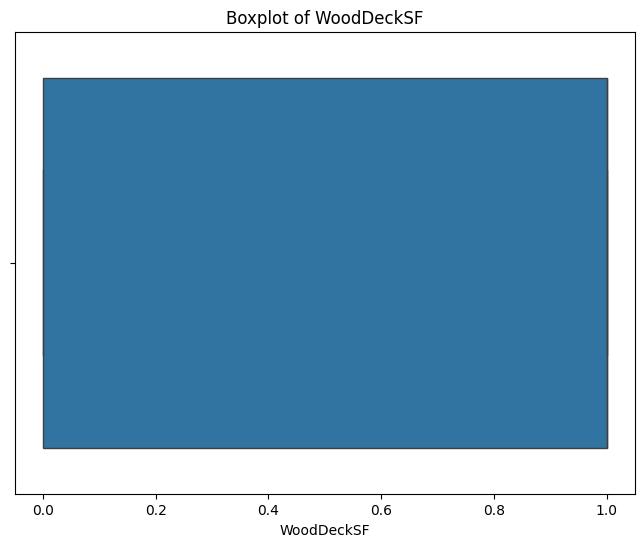

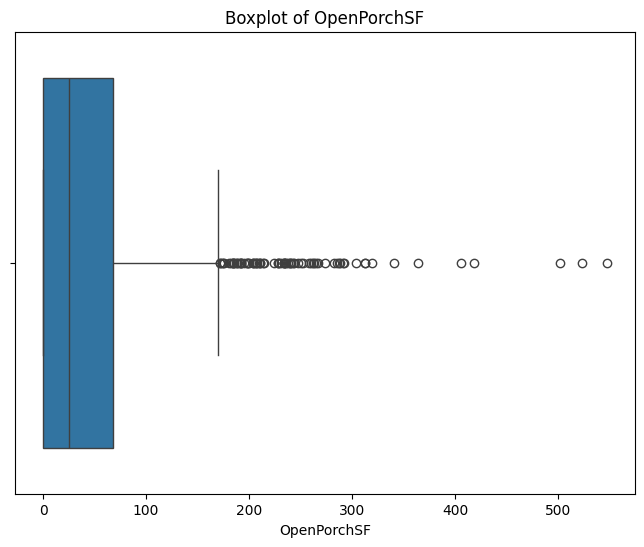

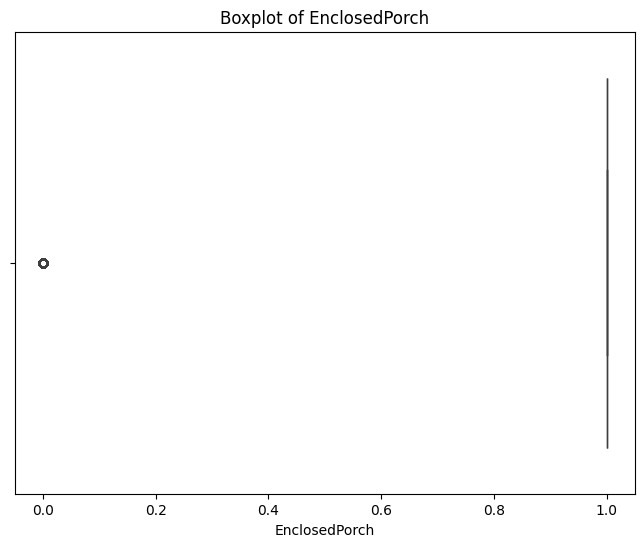

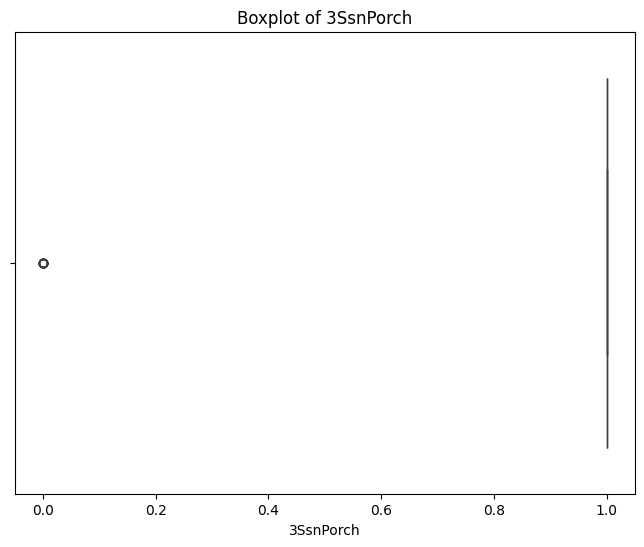

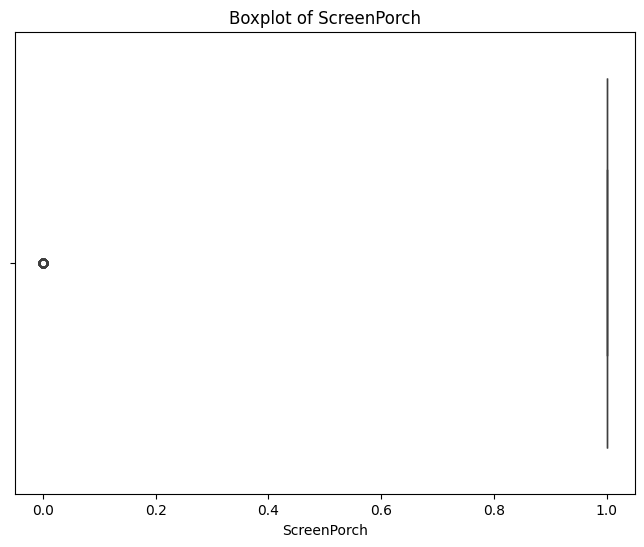

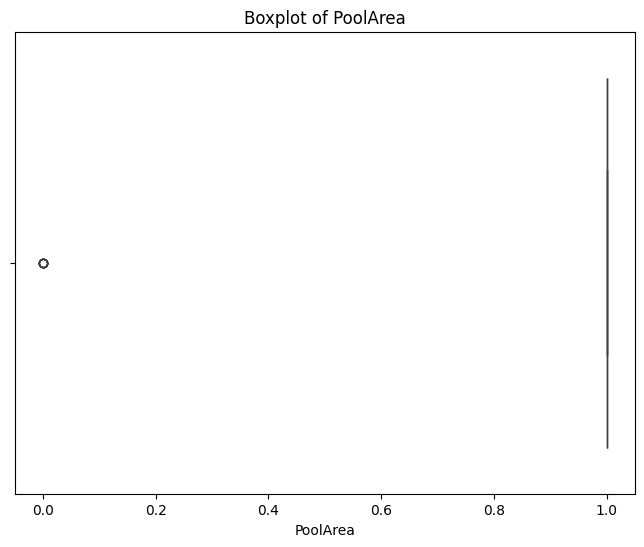

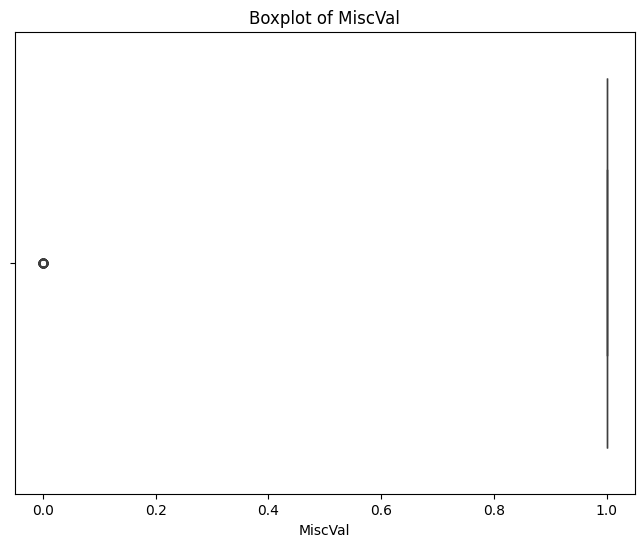

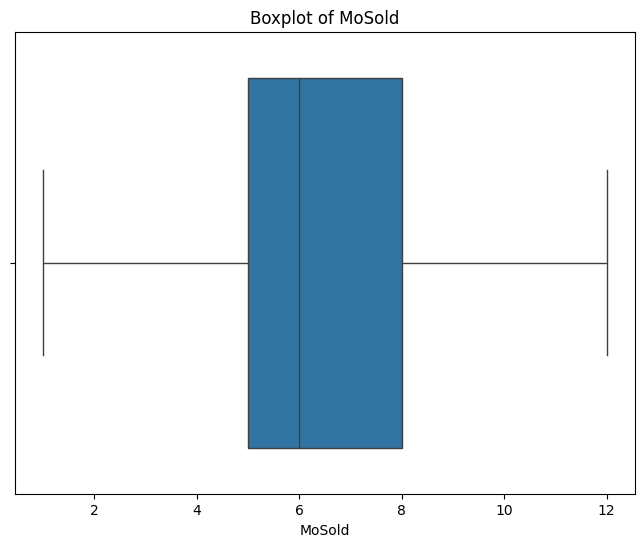

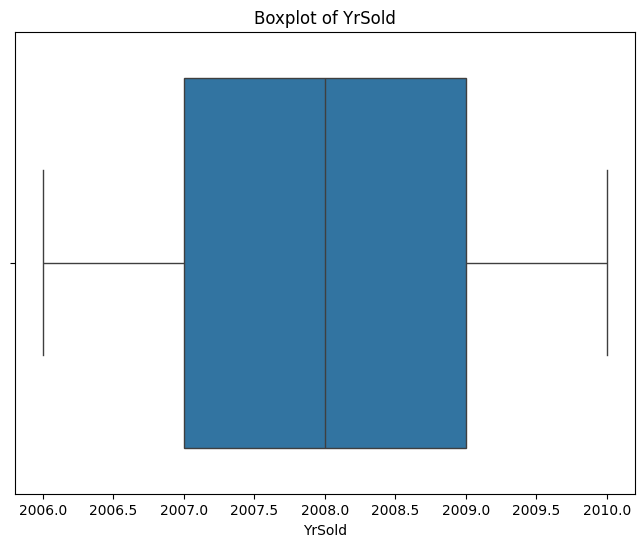

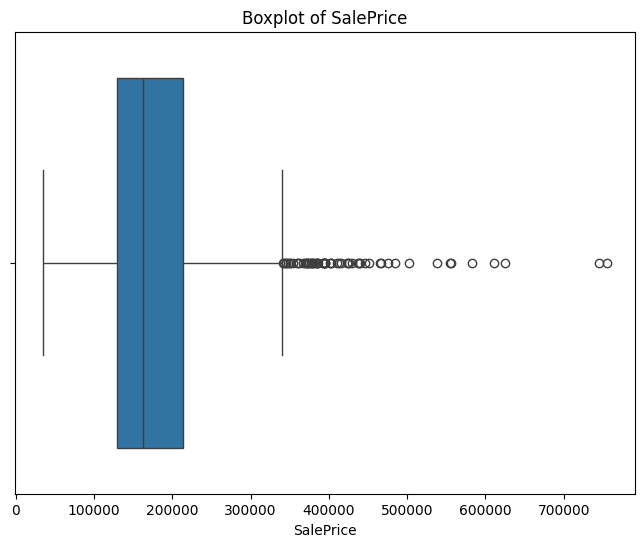

In [101]:
for col in data.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [102]:
# Function to detect outliers in a column
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers


# Detect outliers in each numerical column and store results
outliers_info = {}

for col in data.select_dtypes(include="number").columns:
    outliers = detect_outliers(data, col)
    if not outliers.empty:
        outliers_info[col] = len(outliers)
        print(f"Column '{col}' has {len(outliers)} outliers.")

# Summarize results
if outliers_info:
    print("\nColumns with detected outliers:")
    for col, count in outliers_info.items():
        print(f"{col}: {count} outliers")
else:
    print("No outliers detected in the numerical columns.")

Column 'MSZoning' has 309 outliers.
Column 'LotFrontage' has 106 outliers.
Column 'LotArea' has 69 outliers.
Column 'OverallQual' has 2 outliers.
Column 'OverallCond' has 125 outliers.
Column 'YearBuilt' has 7 outliers.
Column 'BsmtFinSF1' has 7 outliers.
Column 'BsmtFinSF2' has 167 outliers.
Column 'BsmtUnfSF' has 29 outliers.
Column 'TotalBsmtSF' has 61 outliers.
Column '1stFlrSF' has 20 outliers.
Column 'LowQualFinSF' has 26 outliers.
Column 'GrLivArea' has 31 outliers.
Column 'BsmtHalfBath' has 82 outliers.
Column 'BedroomAbvGr' has 35 outliers.
Column 'KitchenAbvGr' has 68 outliers.
Column 'TotRmsAbvGrd' has 30 outliers.
Column 'Fireplaces' has 5 outliers.
Column 'GarageYrBlt' has 1 outliers.
Column 'GarageCars' has 5 outliers.
Column 'GarageArea' has 21 outliers.
Column 'OpenPorchSF' has 77 outliers.
Column 'EnclosedPorch' has 208 outliers.
Column '3SsnPorch' has 24 outliers.
Column 'ScreenPorch' has 116 outliers.
Column 'PoolArea' has 7 outliers.
Column 'MiscVal' has 52 outliers

In [103]:
def remove_outliers(df, column):
    try:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Remove outliers
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    except Exception as e:
        print(f"Error processing column {column}: {e}")
        return df

# Remove outliers from selected columns
columns_with_few_outliers = [
    "YearBuilt", "BsmtFinSF1", "TotRmsAbvGrd", 
    "GarageYrBlt", "GarageArea", "TotalFullBath"
]


for col in columns_with_few_outliers:
    data = remove_outliers(data, col)

print("Outliers removed, new data shape:", data.shape)


Error processing column TotalFullBath: 'TotalFullBath'
Outliers removed, new data shape: (1404, 66)


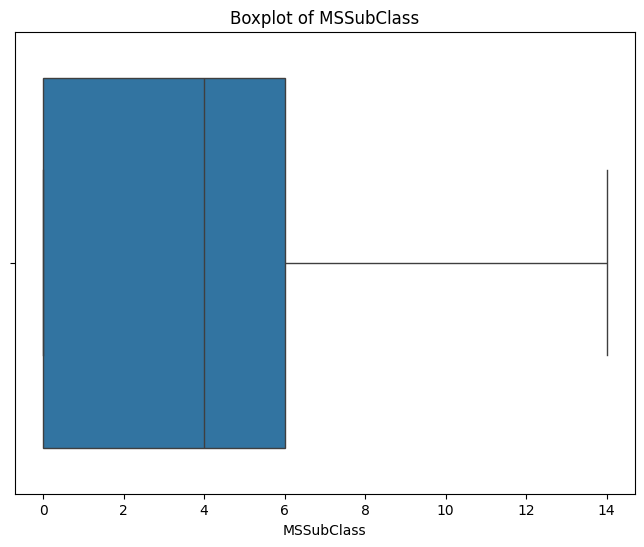

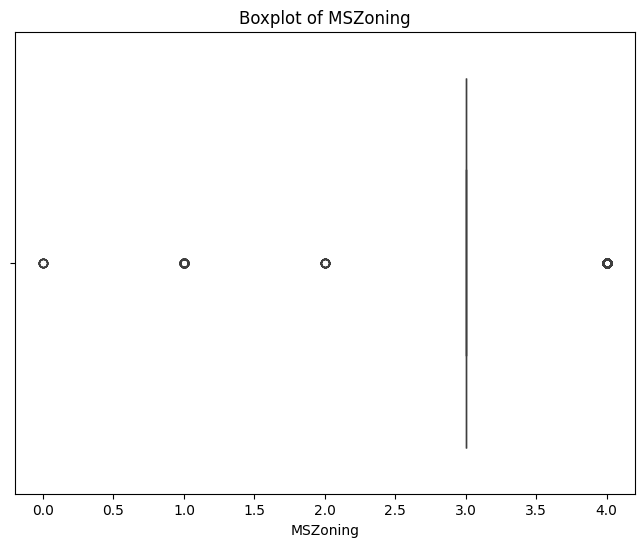

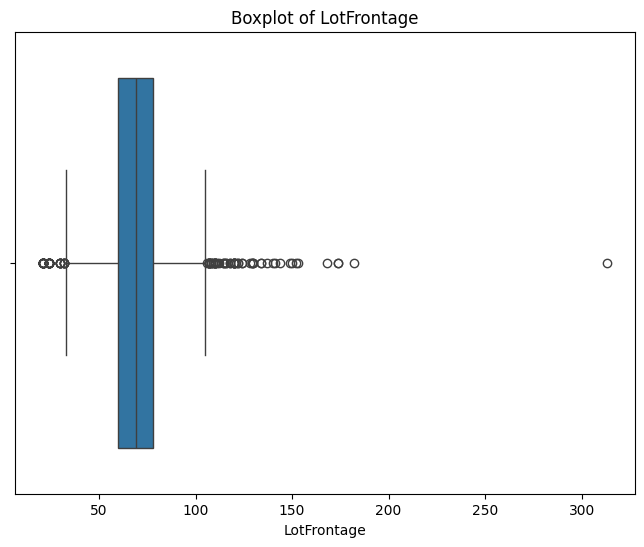

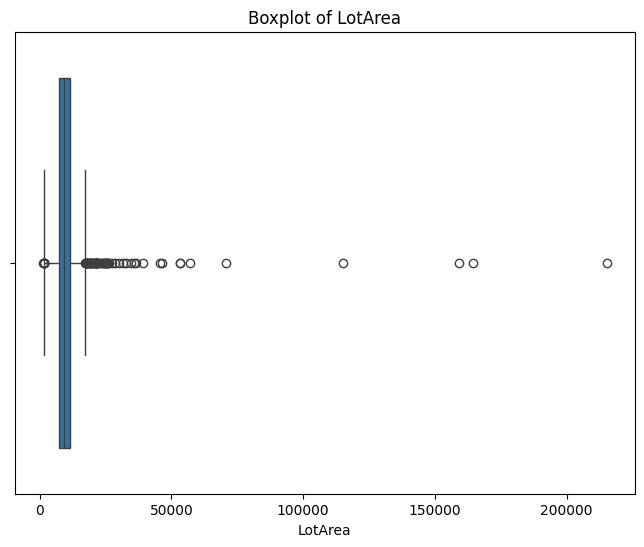

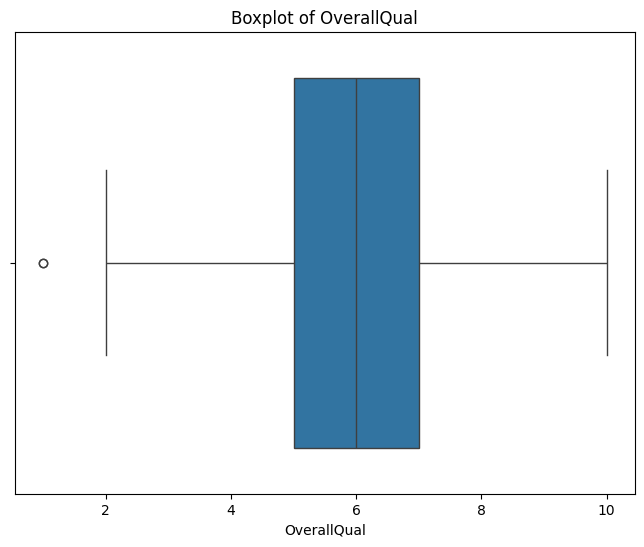

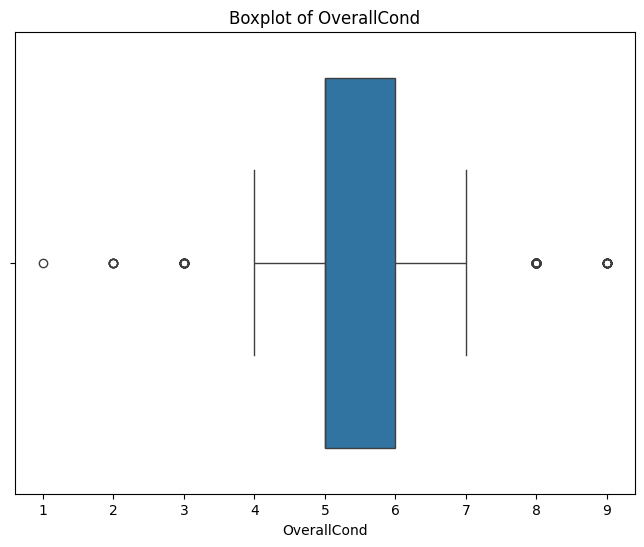

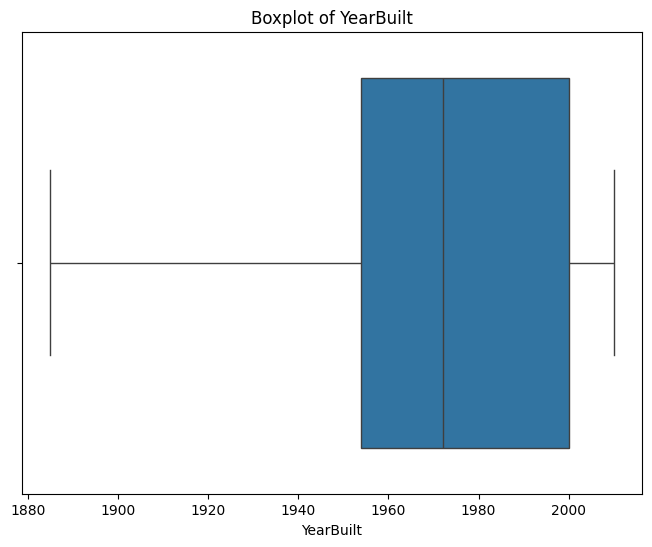

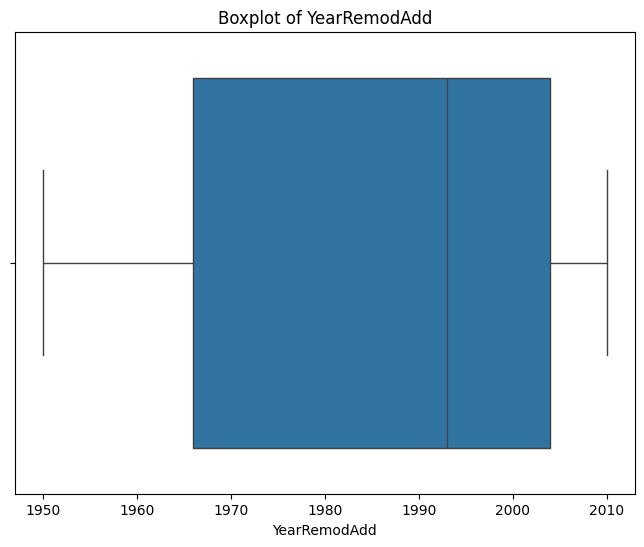

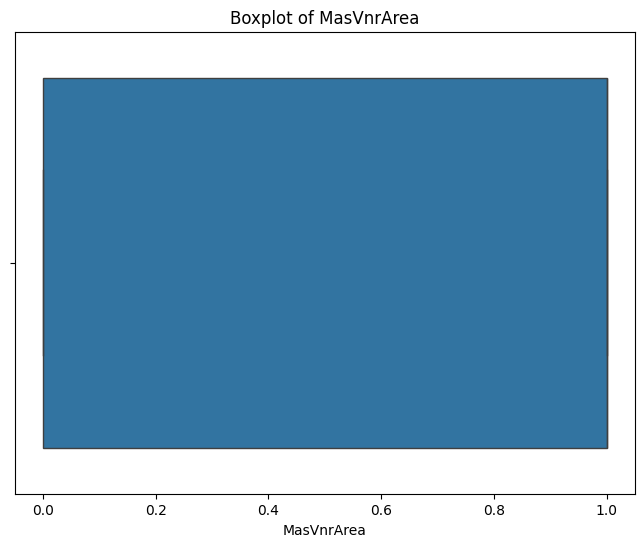

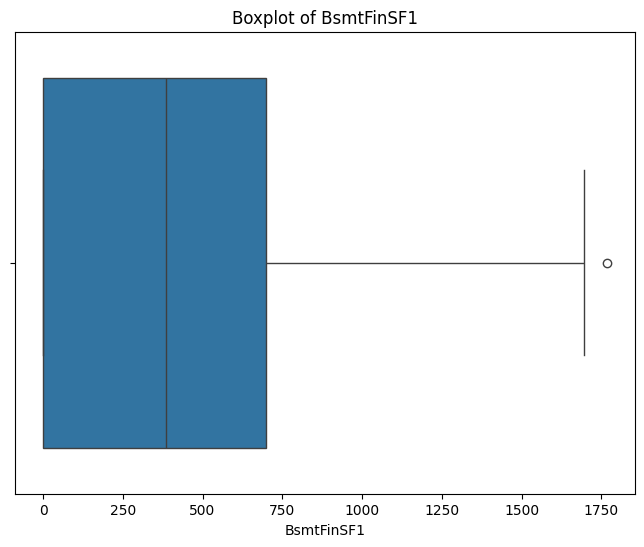

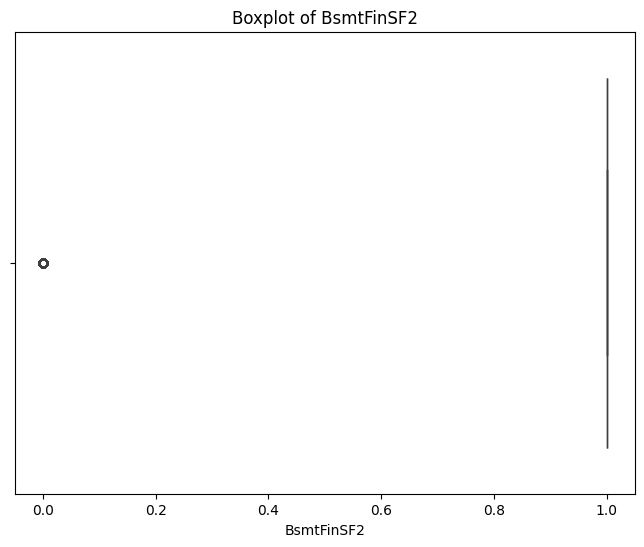

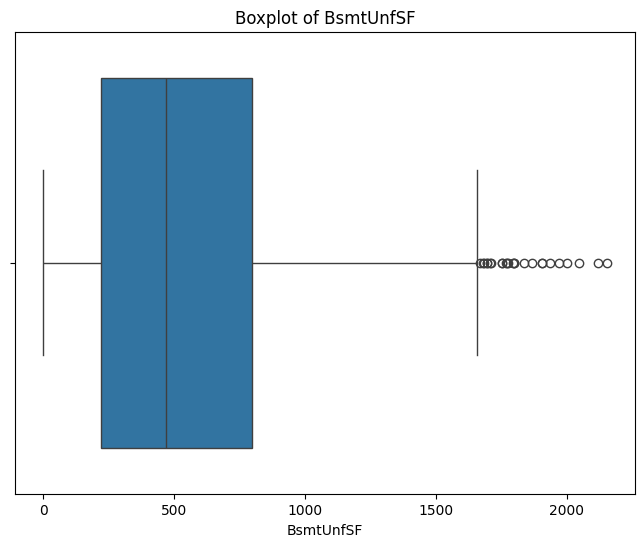

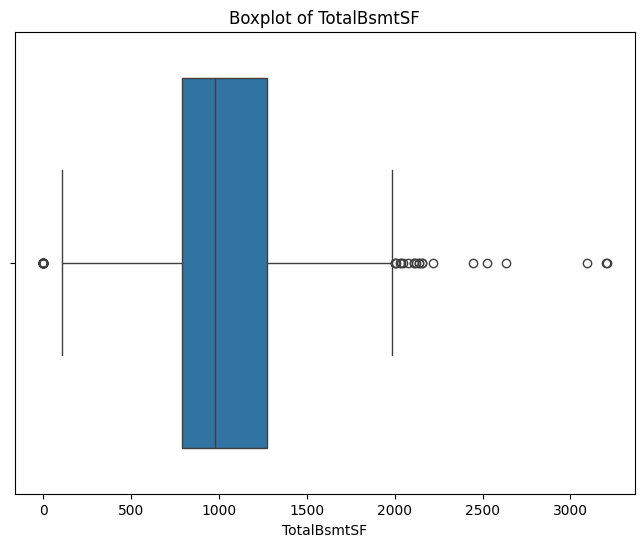

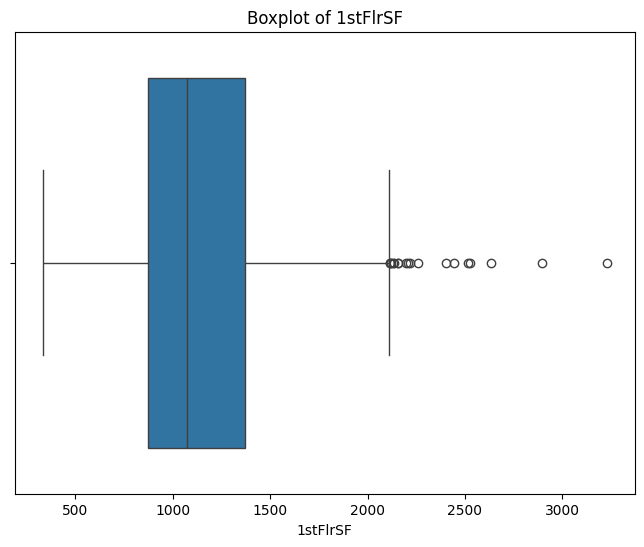

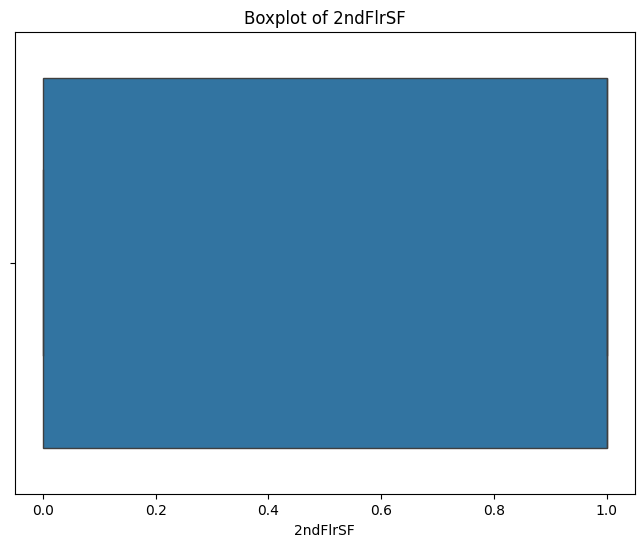

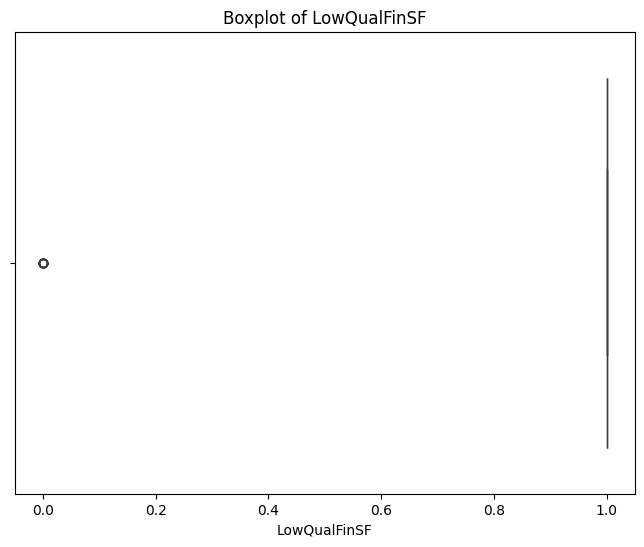

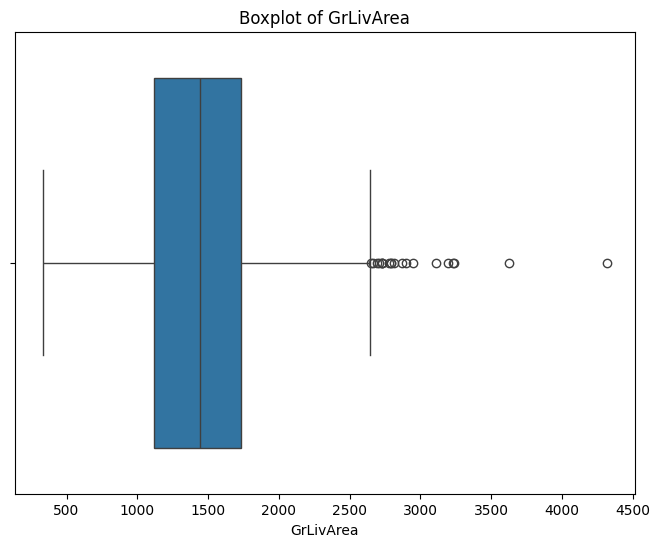

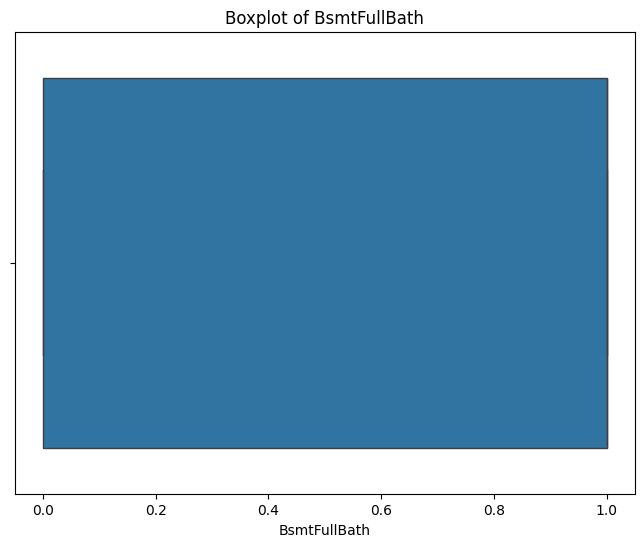

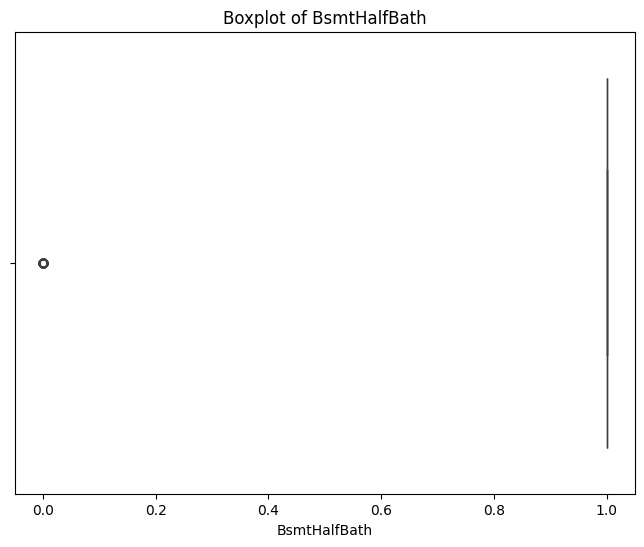

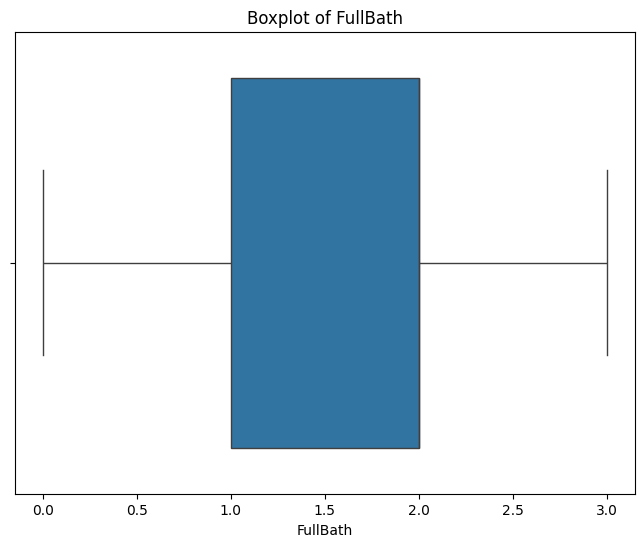

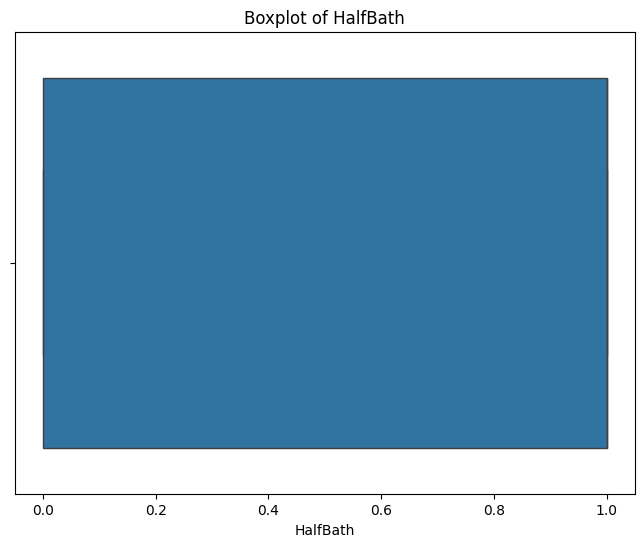

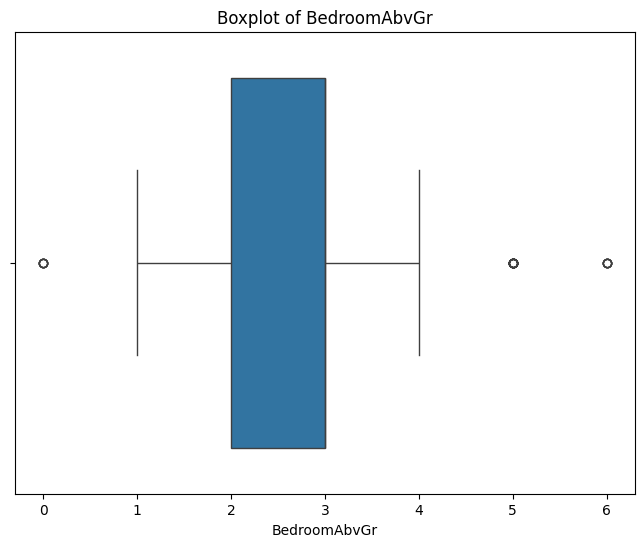

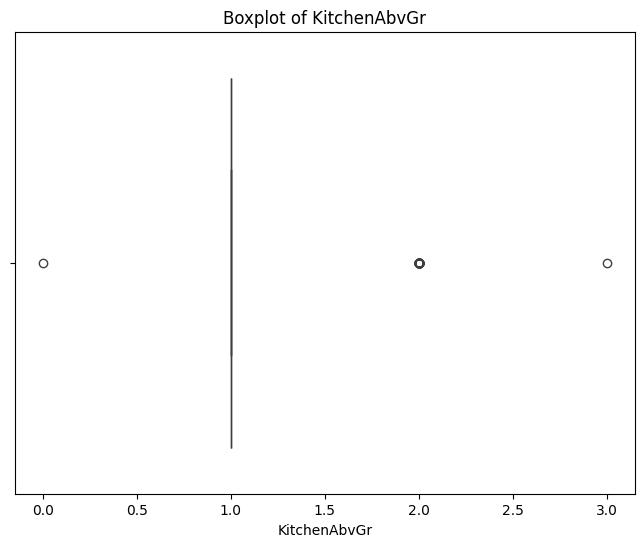

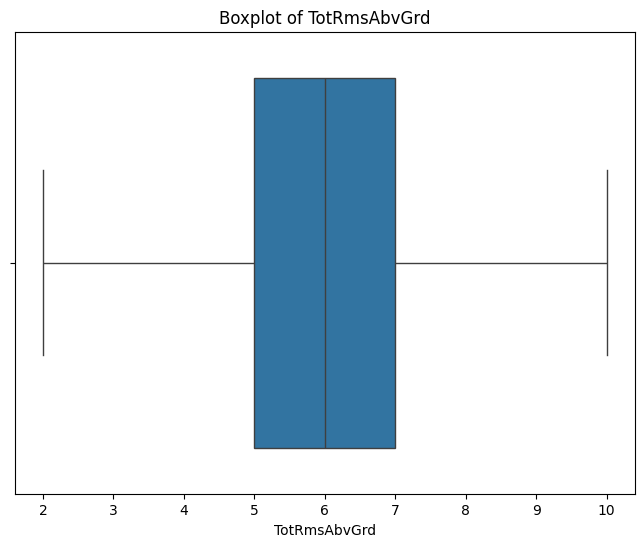

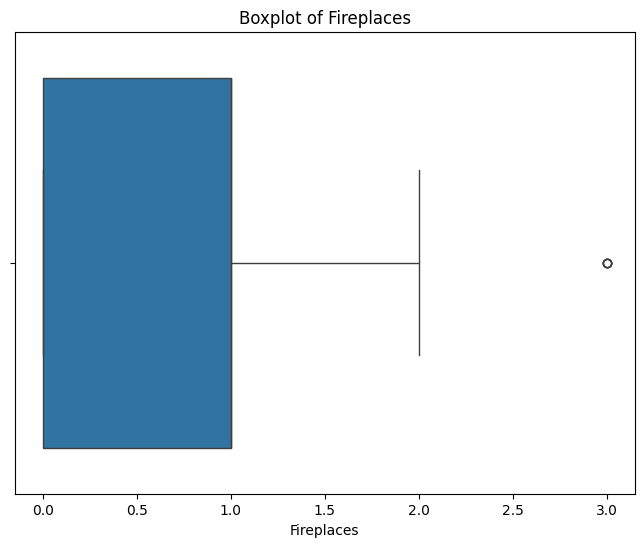

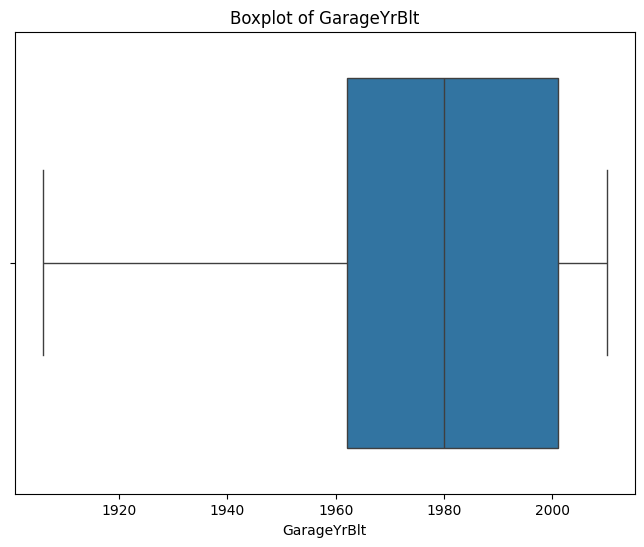

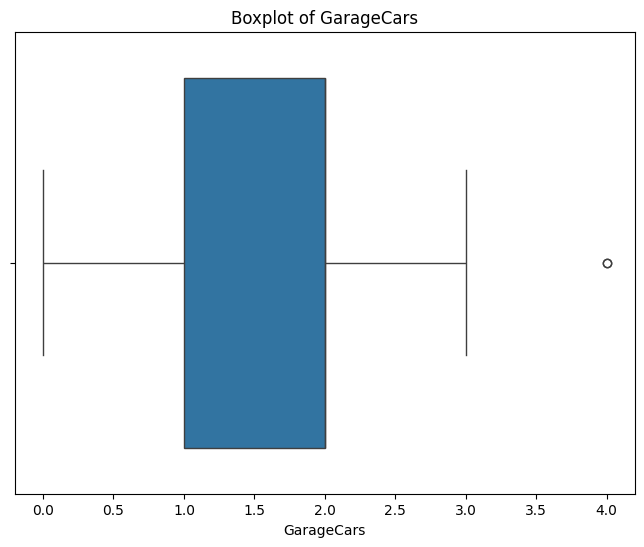

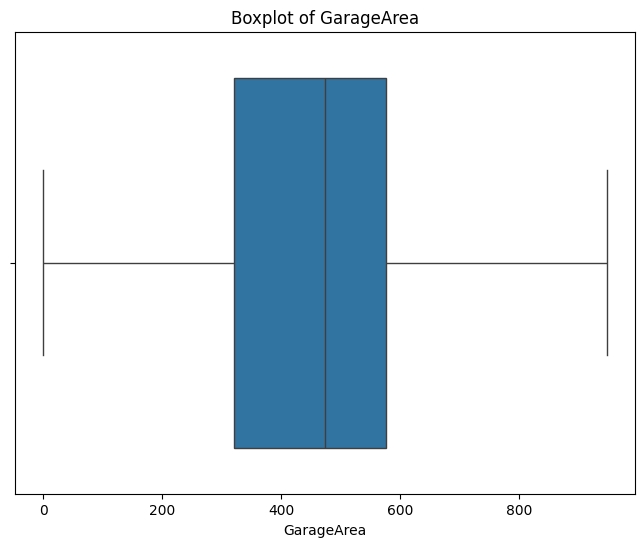

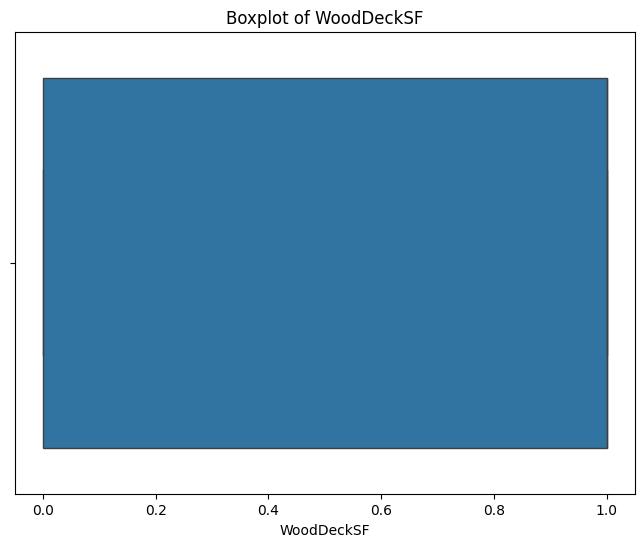

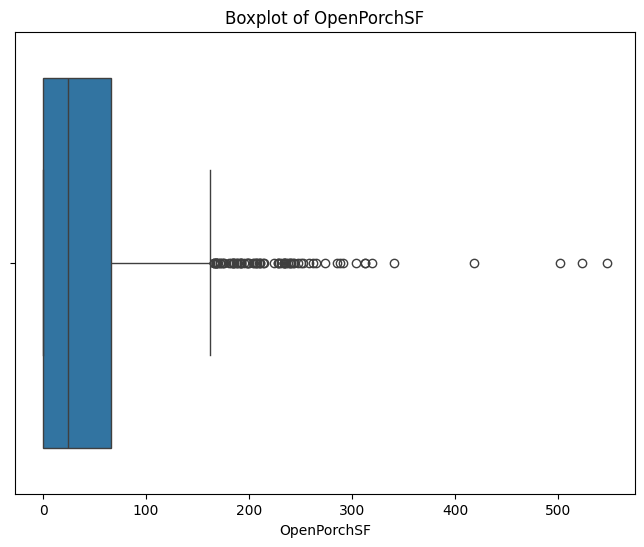

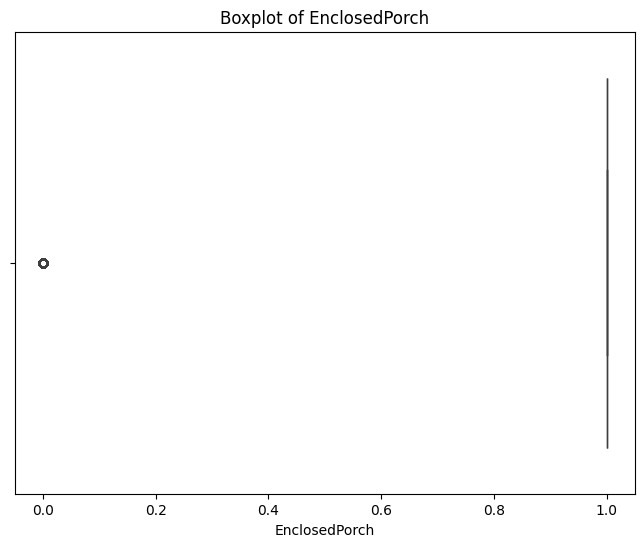

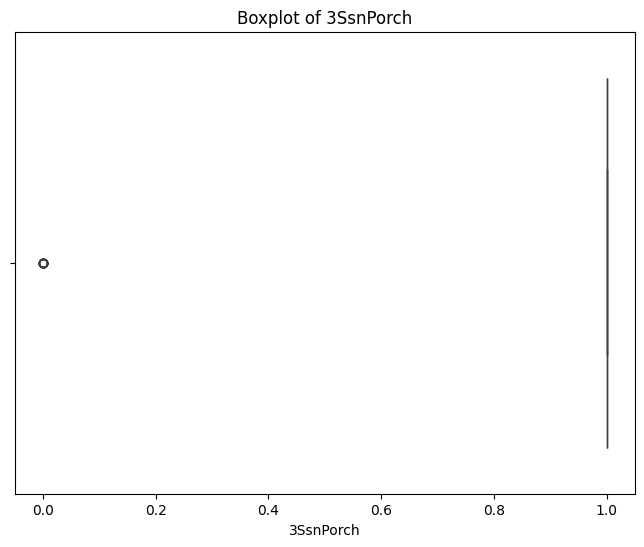

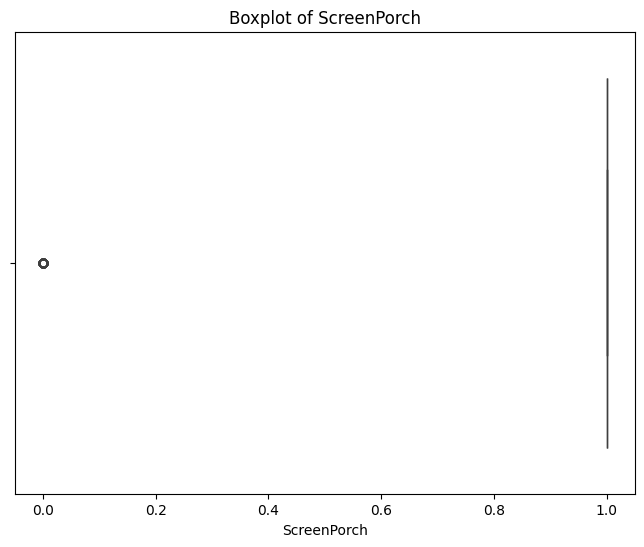

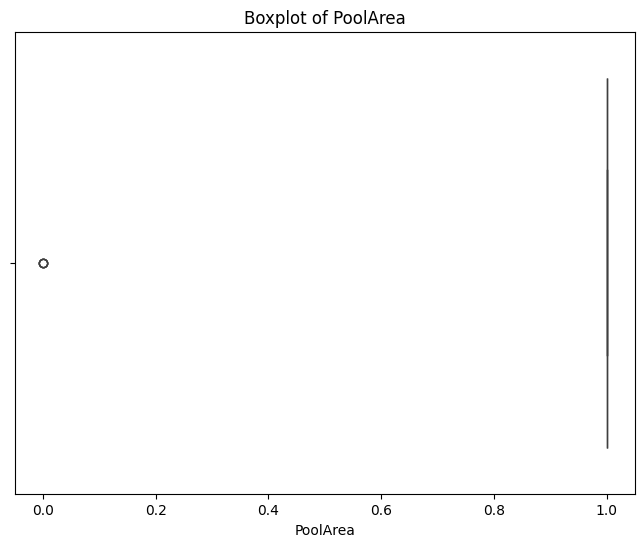

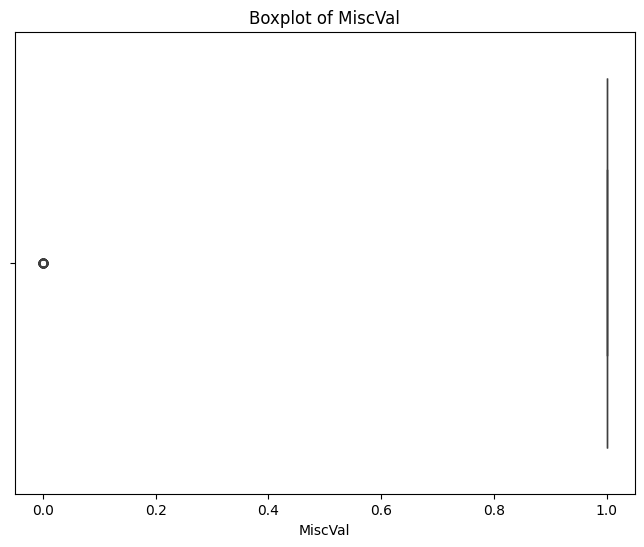

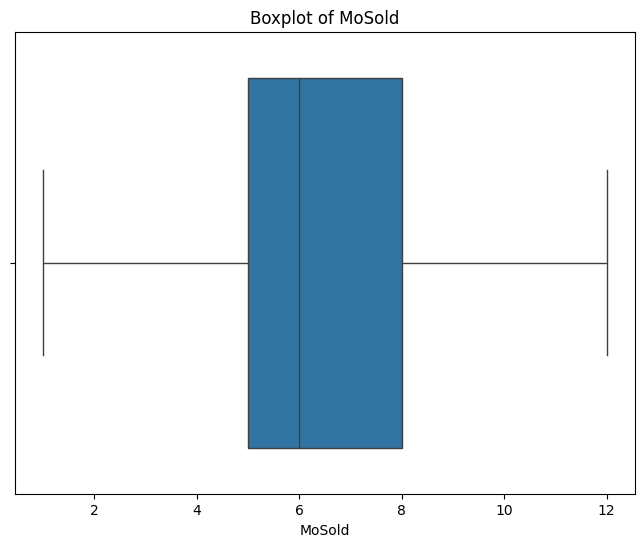

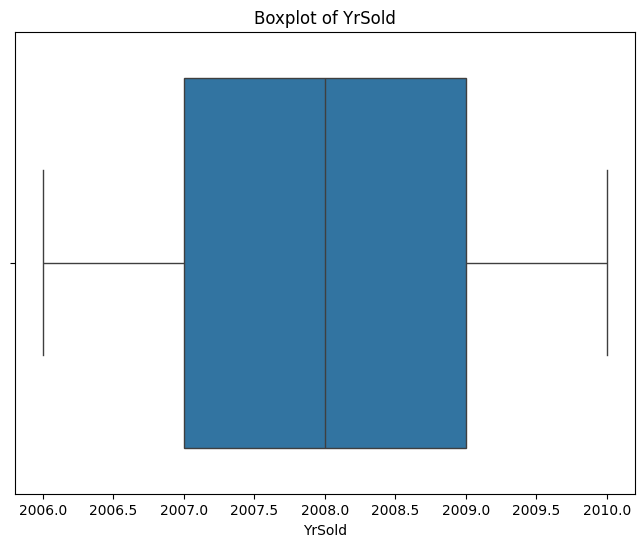

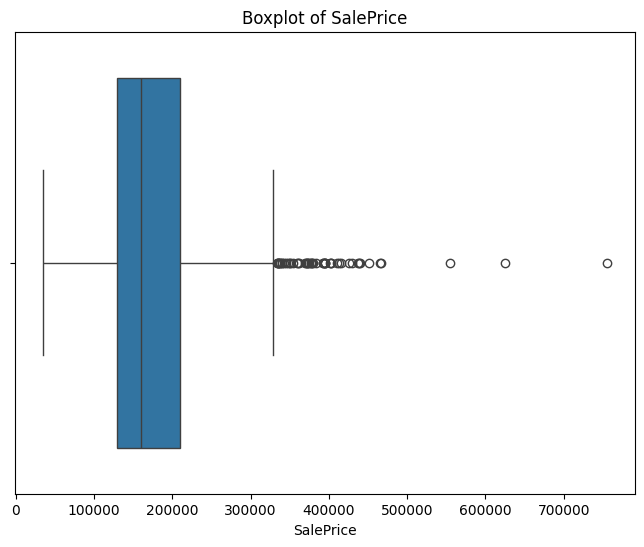

In [104]:
for col in data.select_dtypes(include="number").columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [105]:
def drop_high_frequency_columns(df, threshold=0.97):
    # Iterate over each column in the DataFrame
    for col in df.columns:
        # Calculate the value counts normalized (percentage)
        value_counts = df[col].value_counts(normalize=True)
        
        # Check if any value exceeds the threshold
        if value_counts.max() > threshold:
            # Drop the column if the condition is met
            df.drop(col, axis=1, inplace=True)
    
    return df

data = drop_high_frequency_columns(data)
data

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,1,61,1,1,1,2,2008,WD,Normal,208500
1,0,3,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,1,1,1,5,2007,WD,Normal,181500
2,5,3,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,1,42,1,1,1,9,2008,WD,Normal,223500
3,6,3,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,1,35,0,1,1,2,2006,WD,Abnorml,140000
4,5,3,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,84,1,1,1,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,Reg,Lvl,Inside,Gtl,Gilbert,Norm,...,1,40,1,1,1,8,2007,WD,Normal,175000
1456,0,3,85.0,13175,Reg,Lvl,Inside,Gtl,NWAmes,Norm,...,0,0,1,1,1,2,2010,WD,Normal,210000
1457,6,3,66.0,9042,Reg,Lvl,Inside,Gtl,Crawfor,Norm,...,1,60,1,1,0,5,2010,WD,Normal,266500
1458,0,3,68.0,9717,Reg,Lvl,Inside,Gtl,NAmes,Norm,...,0,0,0,1,1,4,2010,WD,Normal,142125


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1404 entries, 0 to 1459
Data columns (total 63 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1404 non-null   int64  
 1   MSZoning       1404 non-null   int32  
 2   LotFrontage    1404 non-null   float64
 3   LotArea        1404 non-null   int64  
 4   LotShape       1404 non-null   object 
 5   LandContour    1404 non-null   object 
 6   LotConfig      1404 non-null   object 
 7   LandSlope      1404 non-null   object 
 8   Neighborhood   1404 non-null   object 
 9   Condition1     1404 non-null   object 
 10  BldgType       1404 non-null   object 
 11  HouseStyle     1404 non-null   object 
 12  OverallQual    1404 non-null   int64  
 13  OverallCond    1404 non-null   int64  
 14  YearBuilt      1404 non-null   int64  
 15  YearRemodAdd   1404 non-null   int64  
 16  RoofStyle      1404 non-null   object 
 17  Exterior1st    1404 non-null   object 
 18  Exterior2nd  

##
feature engineering

In [107]:
data["Total_floors"] = data["1stFlrSF"] + data["2ndFlrSF"]
data["Total_floors"].head()

0     856
1    1263
2     920
3     961
4    1145
Name: Total_floors, dtype: int64

In [108]:
data["House_quality_score"] = data["OverallCond"] * data["OverallQual"]
data["House_quality_score"].head()

0    35
1    48
2    35
3    35
4    40
Name: House_quality_score, dtype: int64

In [109]:
data.shape

(1404, 65)

In [110]:
data["TotalFullBath"] = data["BsmtFullBath"] + data["FullBath"]
data["TotalHalfBath"] = data["BsmtHalfBath"] + data["HalfBath"]

In [111]:
data.drop(
    [
        "BsmtFullBath",
        "FullBath",
        "BsmtHalfBath",
        "HalfBath",
        "OpenPorchSF",
        "EnclosedPorch",
        "ScreenPorch",
        "OverallCond",
        "OverallQual",
        "1stFlrSF",
        "2ndFlrSF",
    ],
    axis=1,
    inplace=True,
)

In [112]:
data.shape

(1404, 56)

In [113]:
numeric_col = [col for col in data.columns if data[col].dtype != "object"]
categorical_col = [col for col in data.columns if data[col].dtype == "object"]
print(numeric_col)
print(categorical_col)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Total_floors', 'House_quality_score', 'TotalFullBath', 'TotalHalfBath']
['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']


In [114]:
def log_transform_df(dataframe, log_base='natural'):

    
    # Define the logarithmic function based on the base provided
    if log_base == 'natural':
        log_func = np.log

    
    # Apply the logarithmic function to each numeric column in the DataFrame
    transformed_df = dataframe.copy()
    for col in transformed_df.select_dtypes(include='number').columns:
        transformed_df[col] = log_func(transformed_df[col] + 1)
    
    
    return transformed_df

# Example usage:
transformed_df = log_transform_df(data, log_base='natural')
transformed_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Total_floors,House_quality_score,TotalFullBath,TotalHalfBath
0,1.791759,1.386294,4.189655,9.042040,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0.693147,1.098612,7.605392,WD,Normal,12.247699,6.753438,3.583519,1.098612,0.693147
1,0.000000,1.386294,4.394449,9.169623,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0.693147,1.791759,7.604894,WD,Normal,12.109016,7.142037,3.891820,1.386294,0.693147
2,1.791759,1.386294,4.234107,9.328212,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0.693147,2.302585,7.605392,WD,Normal,12.317171,6.825460,3.583519,1.098612,0.693147
3,1.945910,1.386294,4.110874,9.164401,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,0.693147,1.098612,7.604396,WD,Abnorml,11.849405,6.869014,3.583519,0.693147,1.098612
4,1.791759,1.386294,4.442651,9.565284,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0.693147,2.564949,7.605392,WD,Normal,12.429220,7.044033,3.713572,1.098612,0.693147


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6540\217759699.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


<Axes: xlabel='SalePrice', ylabel='Density'>

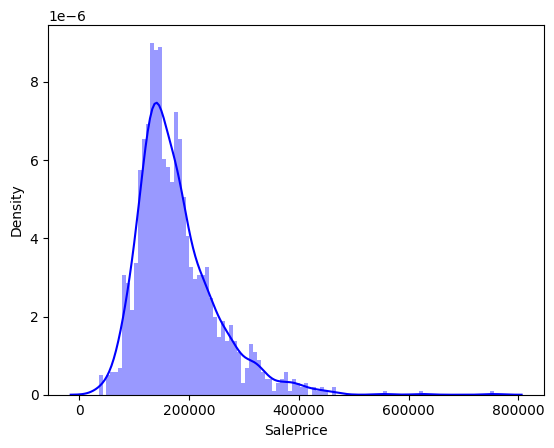

In [115]:
sns.distplot(
    data["SalePrice"], color="b", bins=100, hist_kws={"alpha": 0.4}
)

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>],
       [<Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>],
       [<Axes: title={'center': 'KitchenAbvGr'}>,
        <Axes: title={'center': 'TotRmsAbvGrd'}>,
        <Axes: title={'center': 'Fireplaces'}>,
        <Axes: title={'center': 'GarageYrBlt'}>,
        <Axes: title={'center': 'GarageCars'}>],
       [<Axes: title={'center': 'GarageArea'}>,
        <Axes: title={'center': 'MoSold'}>,
        <Axes: title={'center': 'YrSold'}>,
        <Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'Total_floors'}>],
       [<Axes: title={'center': 'House

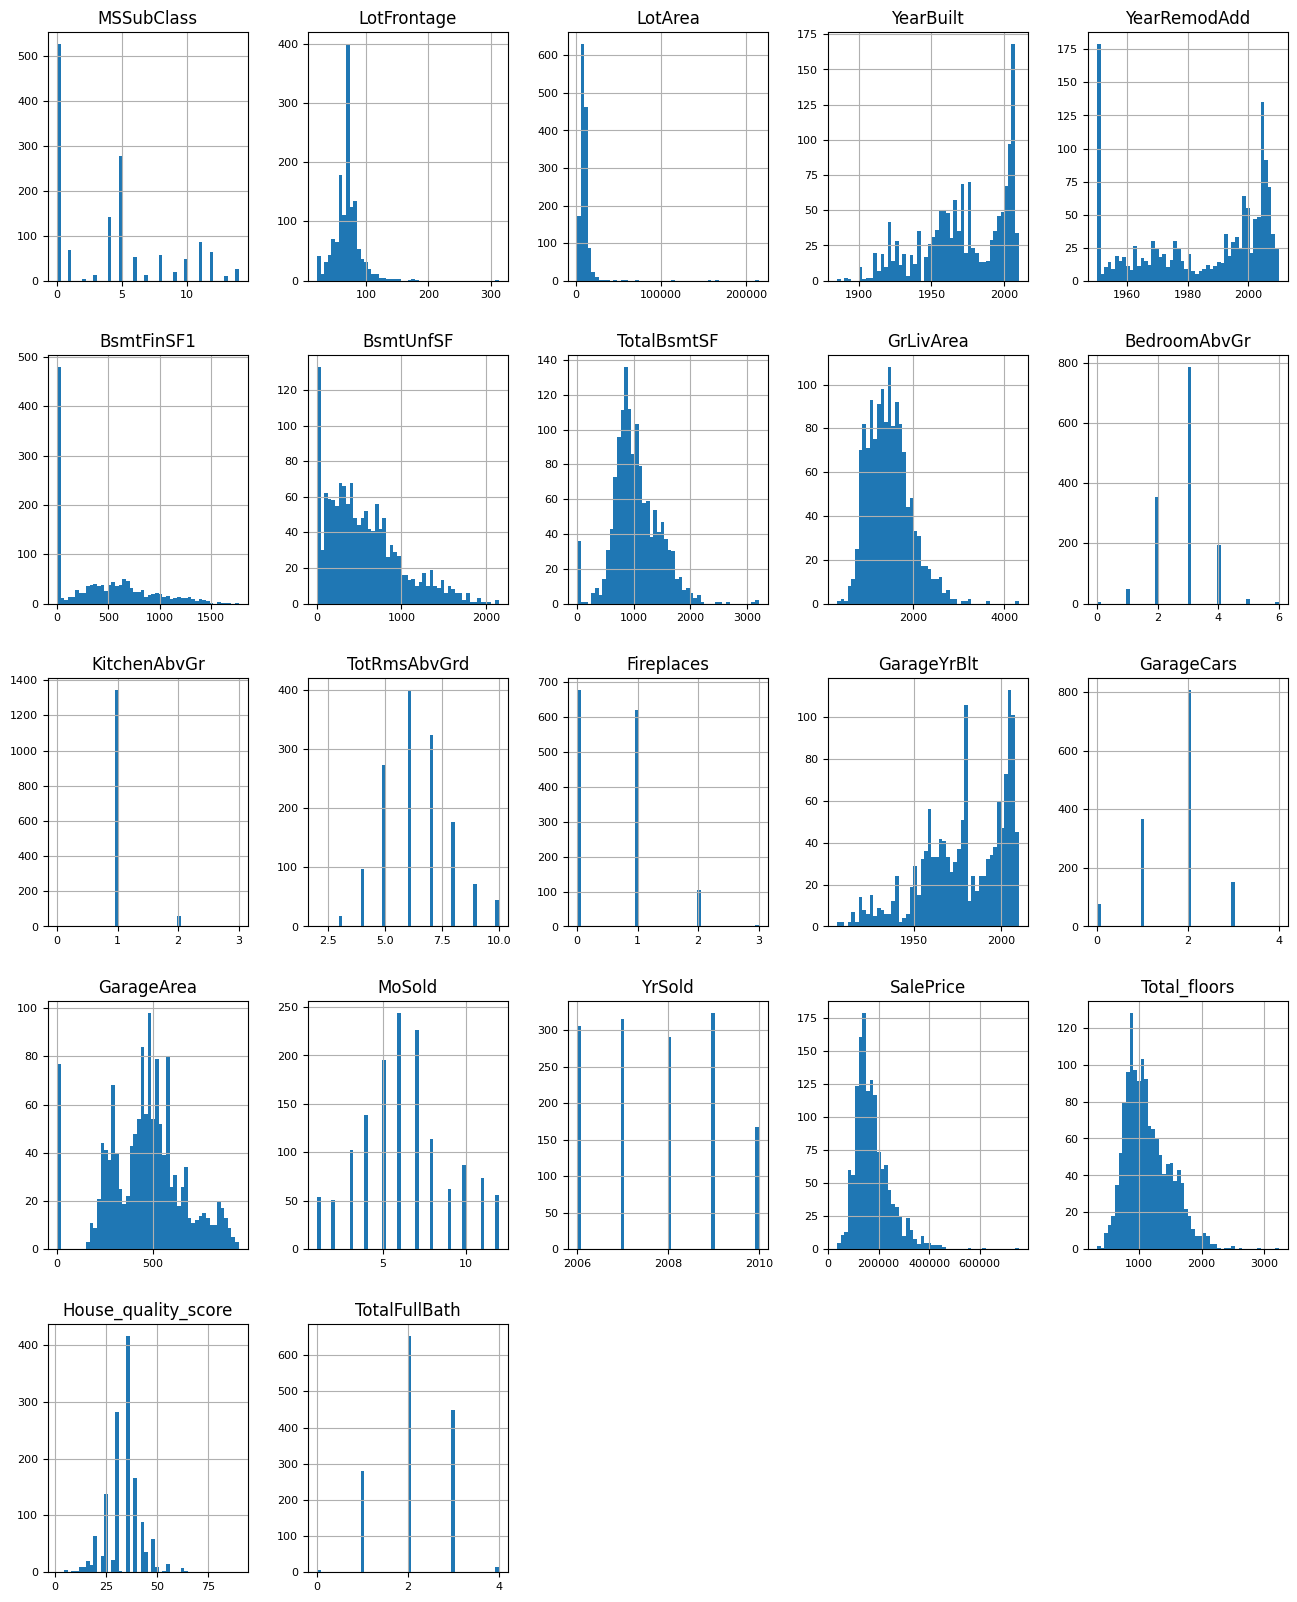

In [116]:
num_df = data.select_dtypes(include=["float64", "int64"])
num_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [117]:
numeric_columns = [
    col for col in data.columns if data[col].dtype != "object" and data[col].dtype != "bool"
]

categorical_columns = [
    col for col in data.columns if data[col].dtype == "object"
]


print("Categorical Columns:", categorical_columns)
print("Numeric Columns:", numeric_columns)
print(data.shape)


Categorical Columns: ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'SaleType', 'SaleCondition']
Numeric Columns: ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Total_floors', 'House_quality_score', 'TotalFullBath', 'TotalHalfBath']
(1404, 56)


In [118]:
for col in numeric_columns:
    print(f"Column: {col}, Type: {data[col].dtype}")

Column: MSSubClass, Type: int64
Column: MSZoning, Type: int32
Column: LotFrontage, Type: float64
Column: LotArea, Type: int64
Column: YearBuilt, Type: int64
Column: YearRemodAdd, Type: int64
Column: MasVnrArea, Type: int32
Column: BsmtFinSF1, Type: int64
Column: BsmtFinSF2, Type: int32
Column: BsmtUnfSF, Type: int64
Column: TotalBsmtSF, Type: int64
Column: GrLivArea, Type: int64
Column: BedroomAbvGr, Type: int64
Column: KitchenAbvGr, Type: int64
Column: TotRmsAbvGrd, Type: int64
Column: Fireplaces, Type: int64
Column: GarageYrBlt, Type: float64
Column: GarageCars, Type: int64
Column: GarageArea, Type: int64
Column: WoodDeckSF, Type: int32
Column: MiscVal, Type: int32
Column: MoSold, Type: int64
Column: YrSold, Type: int64
Column: SalePrice, Type: int64
Column: Total_floors, Type: int64
Column: House_quality_score, Type: int64
Column: TotalFullBath, Type: int64
Column: TotalHalfBath, Type: int32


In [119]:
for col in categorical_col:
    print(f"Column: {col}, Type: {data[col].dtype}")

Column: LotShape, Type: object
Column: LandContour, Type: object
Column: LotConfig, Type: object
Column: LandSlope, Type: object
Column: Neighborhood, Type: object
Column: Condition1, Type: object
Column: BldgType, Type: object
Column: HouseStyle, Type: object
Column: RoofStyle, Type: object
Column: Exterior1st, Type: object
Column: Exterior2nd, Type: object
Column: ExterQual, Type: object
Column: Foundation, Type: object
Column: BsmtQual, Type: object
Column: BsmtExposure, Type: object
Column: BsmtFinType1, Type: object
Column: BsmtFinType2, Type: object
Column: HeatingQC, Type: object
Column: CentralAir, Type: object
Column: Electrical, Type: object
Column: KitchenQual, Type: object
Column: Functional, Type: object
Column: GarageType, Type: object
Column: GarageFinish, Type: object
Column: GarageQual, Type: object
Column: PavedDrive, Type: object
Column: SaleType, Type: object
Column: SaleCondition, Type: object


In [120]:
one_hot_encoded_data = pd.get_dummies(data, columns=categorical_columns)
one_hot_encoded_data


,MSSubClass,MSZoning,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,5,3,65.0,8450,2003,2003,0,706,1,150,...,False,False,False,True,False,False,False,False,True,False
1,0,3,80.0,9600,1976,1976,1,978,1,284,...,False,False,False,True,False,False,False,False,True,False
2,5,3,68.0,11250,2001,2002,0,486,1,434,...,False,False,False,True,False,False,False,False,True,False
3,6,3,60.0,9550,1915,1970,1,216,1,540,...,False,False,False,True,True,False,False,False,False,False
4,5,3,84.0,14260,2000,2000,0,655,1,490,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,5,3,62.0,7917,1999,2000,1,0,1,953,...,False,False,False,True,False,False,False,False,True,False
1456,0,3,85.0,13175,1978,1988,0,790,0,589,...,False,False,False,True,False,False,False,False,True,False
1457,6,3,66.0,9042,1941,2006,1,275,1,877,...,False,False,False,True,False,False,False,False,True,False
1458,0,3,68.0,9717,1950,1996,1,49,0,0,...,False,False,False,True,False,False,False,False,True,False


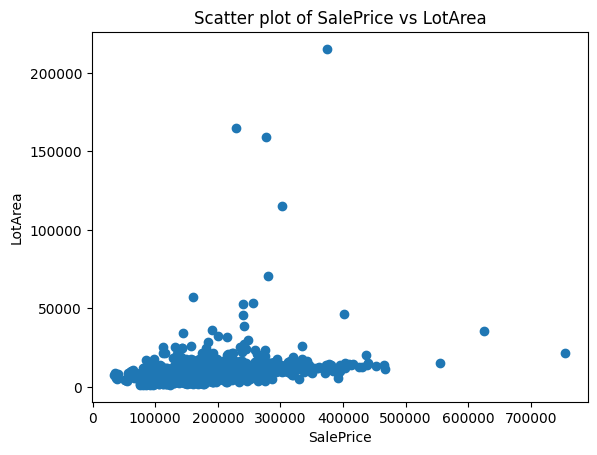

In [121]:
plt.scatter(data['SalePrice'], data["LotArea"])
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.title('Scatter plot of SalePrice vs LotArea')
plt.show()

#
Training the model

In [122]:
df_num = data[numeric_col]


# Define features and target
X = df_num.drop(columns=['SalePrice'])
y = df_num['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [123]:


print(f"xTrain Shape : {X_train.shape}")
print(f"yTrain Shape : {y_train.shape}")
print(f"xTest Shape : {X_test.shape}")
print(f"YTest Shape : {y_test.shape}")



xTrain Shape : (1123, 27)
yTrain Shape : (1123,)
xTest Shape : (281, 27)
YTest Shape : (281,)


In [124]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 27173.7334
